<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загружаем-данные,-подготавливаем-их-к-анализу" data-toc-modified-id="Загружаем-данные,-подготавливаем-их-к-анализу-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загружаем данные, подготавливаем их к анализу</a></span></li><li><span><a href="#Задаём-функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии." data-toc-modified-id="Задаём-функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задаём функции для расчёта и анализа LTV, ROI, удержания и конверсии.</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Маркетинг</a></span></li><li><span><a href="#Оценка-окупаемости-рекламы" data-toc-modified-id="Оценка-окупаемости-рекламы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Оценка окупаемости рекламы</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Маркетинговый анализ приложения Procrastinate Pro+

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

Описание данных.

Структура `visits_info_short.csv`:
- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.

Структура `orders_info_short.csv`:
- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.

Структура `costs_info_short.csv`:
- `dt` — дата проведения рекламной кампании,
- `Channel` — идентификатор рекламного источника,
- `costs` — расходы на эту кампанию.

## Загружаем данные, подготавливаем их к анализу

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
# определяем стиль графиков bmh и улучшаем их качество (разрешение)
%config InlineBackend.figure_format = 'retina'
#plt.style.use('fivethirtyeight')

In [3]:
try:
    visits = pd.read_csv('C:/Users/sorial/Desktop/visits_info_short.csv')
    orders = pd.read_csv('C:/Users/sorial/Desktop/orders_info_short.csv')
    costs = pd.read_csv('C:/Users/sorial/Desktop/costs_info_short.csv')
except:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')

In [4]:
# выведем общую информацию по каждой таблице
visits.info()
print('')
orders.info()
print('')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column 

**Промежуточный вывод:** 
- уже на данном этапе видно, что таблицы не содержат пропусков;
- также можно заметить, что столбцам с датами присвоен тип *object*, который далее можно заменить на тип *datetime*.

**Предобработка данных.**

Для начала можно изменить названия столбцов, привести их к общему виду. Для этого приведём их к нижнему регистру и заменим пробелы на нижнее подчеркивание.

In [5]:
visits.columns = visits.columns.str.lower().str.replace(" ", "_")
orders.columns = orders.columns.str.lower().str.replace(" ", "_")
costs.columns = costs.columns.str.lower().str.replace(" ", "_")

In [6]:
# проверяем названия столбцов
print(visits.columns)
print(orders.columns)
costs.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')
Index(['user_id', 'event_dt', 'revenue'], dtype='object')


Index(['dt', 'channel', 'costs'], dtype='object')

Сразу заменим типы данных для столбцов с датой на *datetime*.

In [7]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Проверим оставшиеся столбцы в таблицах на возможность изменить их тип данных.

In [8]:
visits.head(5)

user_id         region   device  channel       session_start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   

          session_end  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08  
3 2019-05-01 00:54:25  
4 2019-05-01 03:57:40

In [9]:
orders.head(5)

user_id            event_dt  revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
2  529610067795 2019-05-01 11:34:04     4.99
3  319939546352 2019-05-01 15:34:40     4.99
4  366000285810 2019-05-01 13:59:51     4.99

In [10]:
costs.head(5)

dt   channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

Как мы видим по остальным столбцам тип данных стоит уже соответствующий.

Проверяем данные на наличие явных дубликатов.

In [11]:
print(visits.loc[visits.duplicated()])
print(orders.loc[orders.duplicated()])
print(costs.loc[costs.duplicated()])

Empty DataFrame
Columns: [user_id, region, device, channel, session_start, session_end]
Index: []
Empty DataFrame
Columns: [user_id, event_dt, revenue]
Index: []
Empty DataFrame
Columns: [dt, channel, costs]
Index: []


Явных дубликатов не обнаружено.

## Задаём функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Описание функций для вычисления значений метрик:
- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

Описание функций для построения графиков:
- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [12]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [13]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [14]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [15]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [16]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [17]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [18]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [19]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

Составляем профили пользователей. Определяем минимальную и максимальную даты привлечения пользователей.

In [20]:
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

In [21]:
profiles['first_ts'].min()

Timestamp('2019-05-01 00:00:41')

In [22]:
profiles['first_ts'].max()

Timestamp('2019-10-27 23:59:04')

**Вывод**:
- минимальная дата привлечения клиентов 1 мая 2019 года,
- максимальная дата привлечения клиентов 27 октября 2019 года,
- полученные даты совпали с заданными условиями в проекте.

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [23]:
# группируем профили по стране, выводим количество пользователей
# и долю платящих пользователей
(
    profiles
    .groupby('region')
    .agg({'user_id':'nunique', 'payer':'mean'})
    .sort_values(by='user_id', ascending=False)
)

user_id     payer
region                          
United States   100002  0.069019
UK               17575  0.039829
France           17450  0.037994
Germany          14981  0.041119

**Вывод:**
- больше всего пользователей приходится на США, при этом доля платящих в этой стране больше других (6.9%),
- на последнем месте по количеству пользователей Германия, но по доле платящих пользователей (4.11%) она находится на втором месте, после США.

Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [24]:
# группируем профили по устройству, выводим количество пользователей
# и долю платящих пользователей
(
    profiles
    .groupby('device')
    .agg({'user_id':'nunique', 'payer':'mean'})
    .sort_values(by='user_id', ascending=False)
)

user_id     payer
device                    
iPhone     54479  0.062079
Android    35032  0.058518
PC         30455  0.050468
Mac        30042  0.063644

**Вывод:**
- больше всего пользователей приходится на айфоны, при этом доля платящих составляет 6,2%, что находится на втором месте после Mac устройств (6,3%),
- андроид устройства находятся на втором месте по количеству пользователей и на третьем по доле платящих (5,8%),
- количество пользователей на PC и на Mac почти равное, но доля платящих на PC находится на последнем месте (5%).

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [25]:
# группируем профили по каналам привлечения, выводим количество пользователей
# и долю платящих пользователей
(
    profiles
    .groupby('channel')
    .agg({'user_id':'nunique', 'payer':'mean'})
    .sort_values(by='payer', ascending=False)
)

user_id     payer
channel                              
FaceBoom              29144  0.122049
AdNonSense             3880  0.113402
lambdaMediaAds         2149  0.104700
TipTop                19561  0.096007
RocketSuperAds         4448  0.079137
WahooNetBanner         8553  0.052964
YRabbit                4312  0.038265
MediaTornado           4364  0.035747
LeapBob                8553  0.030633
OppleCreativeMedia     8605  0.027077
organic               56439  0.020553

**Вывод:**
- больше всего пользователей пришло по каналу *organic* (т.е. они самостоятельно нашли приложение), но доля платящих пользователей меньше всего (2%),
- на втором месте по количеству пришедших клиентов канал *FaceBoom*, а доля платящих пользователей больше чем у других каналов (12,2%),
- на третьем месте по количеству пришедших клиентов канал *TipTop*, при этом доля платящих пользователей на четвертом месте (9,6%),
- меньше всего клиентов привели каналы *AdNonSense* и *lambdaMediaAds*, хоть и доля платящих пользователей у них на втором (11,3%) и третьем (10,47%) местах соответственно.

## Маркетинг

Посчитаем общую сумму расходов на маркетинг.

In [26]:
all_costs = costs['costs'].sum()
all_costs

105497.30000000002

**Вывод:** общая сумма расходов на маркетинг составила *105497,3*.

Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

                       costs
channel                     
TipTop              54751.30
FaceBoom            32445.60
WahooNetBanner       5151.00
AdNonSense           3911.25
OppleCreativeMedia   2151.25
RocketSuperAds       1833.00
LeapBob              1797.60
lambdaMediaAds       1557.60
MediaTornado          954.48
YRabbit               944.22


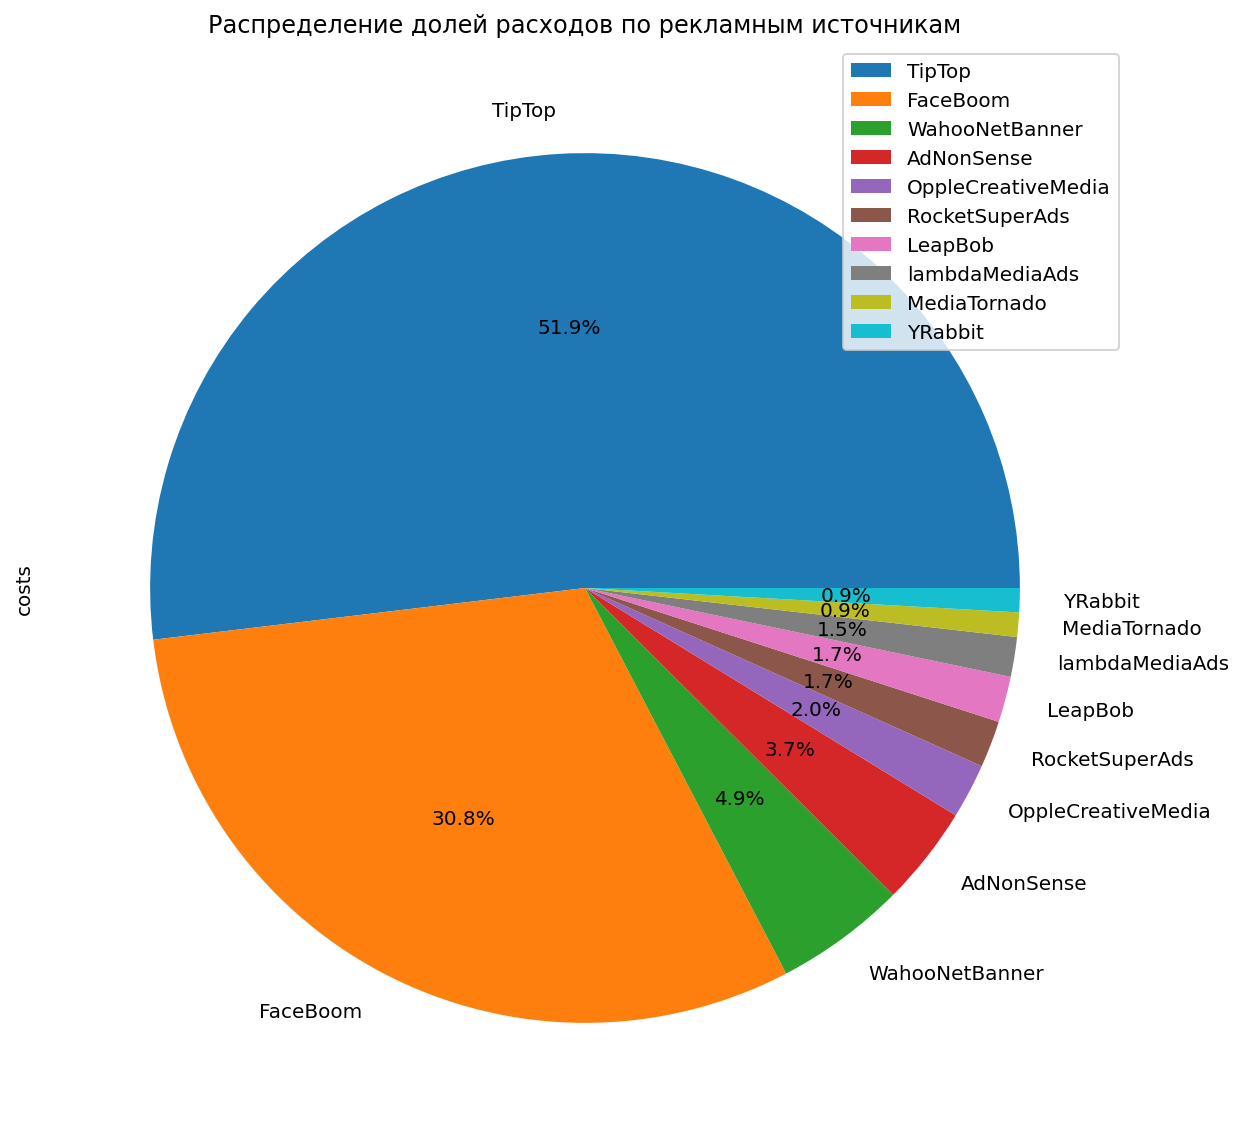

In [45]:
# группируем costs по каналам привлечения
# выводим сумму потраченную на каждый канал

costs_per_channel = \
(
    costs
    .groupby('channel')
    .agg({'costs':'sum'})
    .sort_values(by='costs', ascending=False)
)
print(costs_per_channel)
costs_per_channel.plot(kind='pie', y='costs', figsize=(15,10), autopct='%1.1f%%',
                       title='Распределение долей расходов по рекламным источникам')
plt.show()

**Вывод:**
- больше всего средств было потрачено на канал *TipTop* (54751,3),
- на втором месте по тратам канал *FaceBoom* (32445,6),
- на остальные каналы было потрачено в разы меньше средств.

Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.

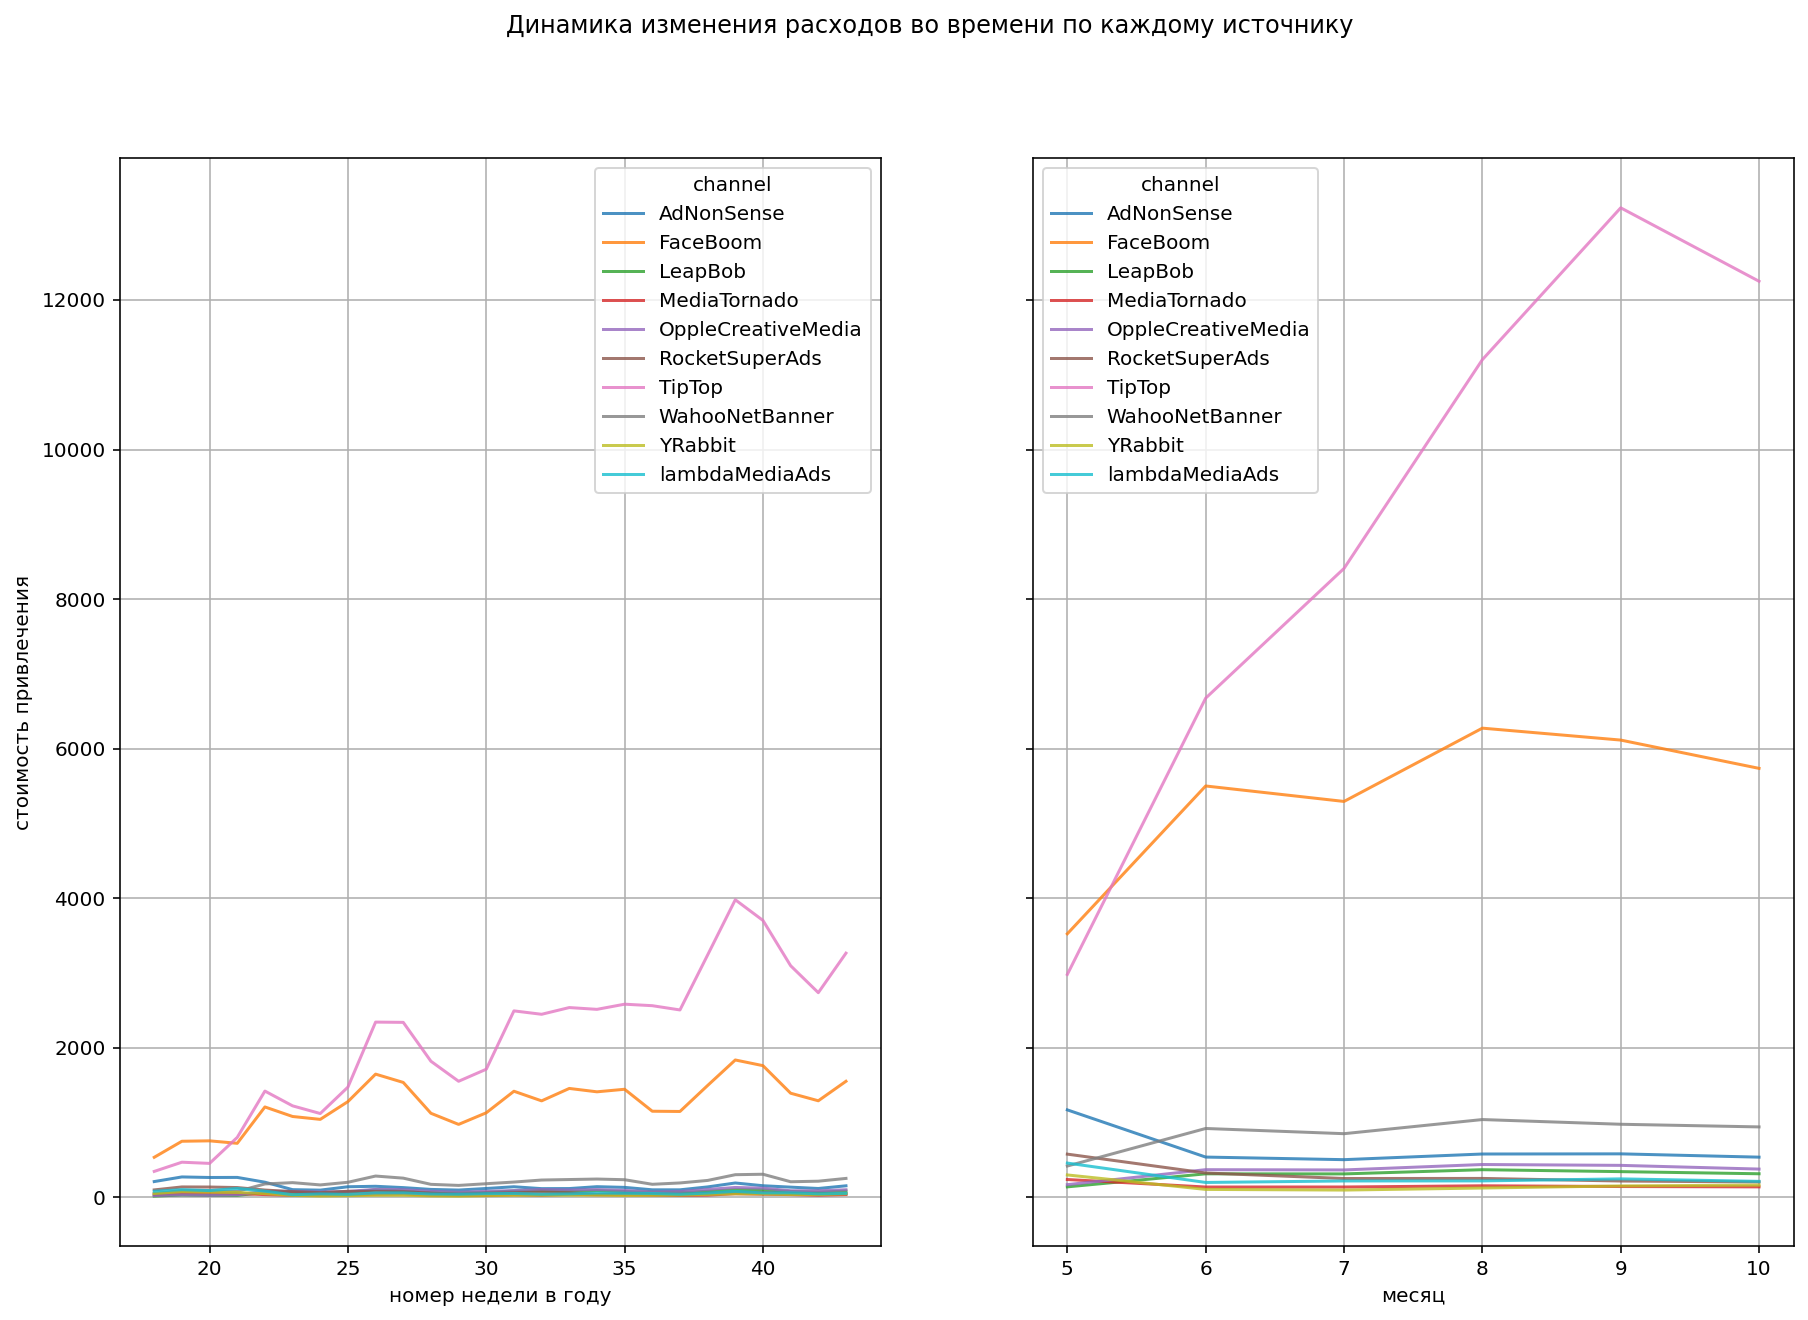

In [28]:
# отдельно выделим из даты номер недели и месяц
# построим plot по pivot_table
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs['month'] = pd.to_datetime(costs['dt']).dt.month
fig, axs = plt.subplots(figsize=(15, 10))
ax1 = plt.subplot(1, 2, 1)
(
    costs
    .pivot_table(index='week' , columns='channel', values='costs', aggfunc='sum')
    .plot(ylabel='стоимость привлечения', xlabel='номер недели в году', 
          grid=True, stacked=False, alpha = 0.8, ax=ax1)
)
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
(
    costs
    .pivot_table(index='month' , columns='channel', values='costs', aggfunc='sum')
    .plot(xlabel='месяц', grid=True, stacked=False, alpha = 0.8, ax=ax2)
)
plt.suptitle('Динамика изменения расходов во времени по каждому источнику')
plt.show()

**Вывод:** из графика выше видно, как средства примерно равнозначно вкладывались больше всего в каналы *TipTop* и *FaceBoom*.

Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

In [29]:
(
    profiles
    .groupby('channel')
    .agg({'acquisition_cost':'mean'})
    .sort_values(by='acquisition_cost', ascending=False)
)

acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172
organic                     0.000000

Для сравнения рассчитаем средний CAC на одного клиента по всему проекту.

In [46]:
profiles.query('channel != "organic"')['acquisition_cost'].mean()

1.1274813239427588

**Вывод:** 
- больше всего в среднем стоило привлечение пользователей из канала *TipTop* (2.79),
- гораздо меньше стоило привлечение пользователей из канала *FaceBoom* (1.11), тем не менее по стоимости клиента этот канал на втором месте,
- меньше всего стоило привлечение по каналу *LeapBob* (0.21),
- средний CAC при этом составил 1.12, что значительно меньше чем CAC у первых трёх каналов *TipTop*, *FaceBoom*, *AdNonSense* и это уже может сказать об их большой стоимости привлечения пользователей.

Не учитываем канал *organic* поскольку, это пользователи которые самостоятельно нашли продукт.

**Промежуточный вывод:**
- больше всего средств тратится на рекламные каналы *TipTop* и *FaceBoom*, при том что CAC канала *TipTop* 2.79 и CAC канала *FaceBoom* 1.11 значительно выше среднего CAC 0.70 по проекту,
- за отчетный период просматривается высокая динамика роста инвестиций в каналы привлечения *TipTop* и *FaceBoom*.

## Оценка окупаемости рекламы

Для начала проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
При анализе не будем учитывать данные с канала *organic*, поскольку органический трафик не требует вложений и нет смысла его рассматривать при определении маркетинговой стратегии.

Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения, соответственно из этого задаем горизонт анализа и момент анализа.

In [31]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
analysis_horizon = 14  # горизонт анализа

In [32]:
# считаем ltv и roi
# и исключаем канал organic
profiles = profiles.query('channel != "organic"')
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = \
get_ltv(profiles, orders, observation_date, analysis_horizon, dimensions=[])

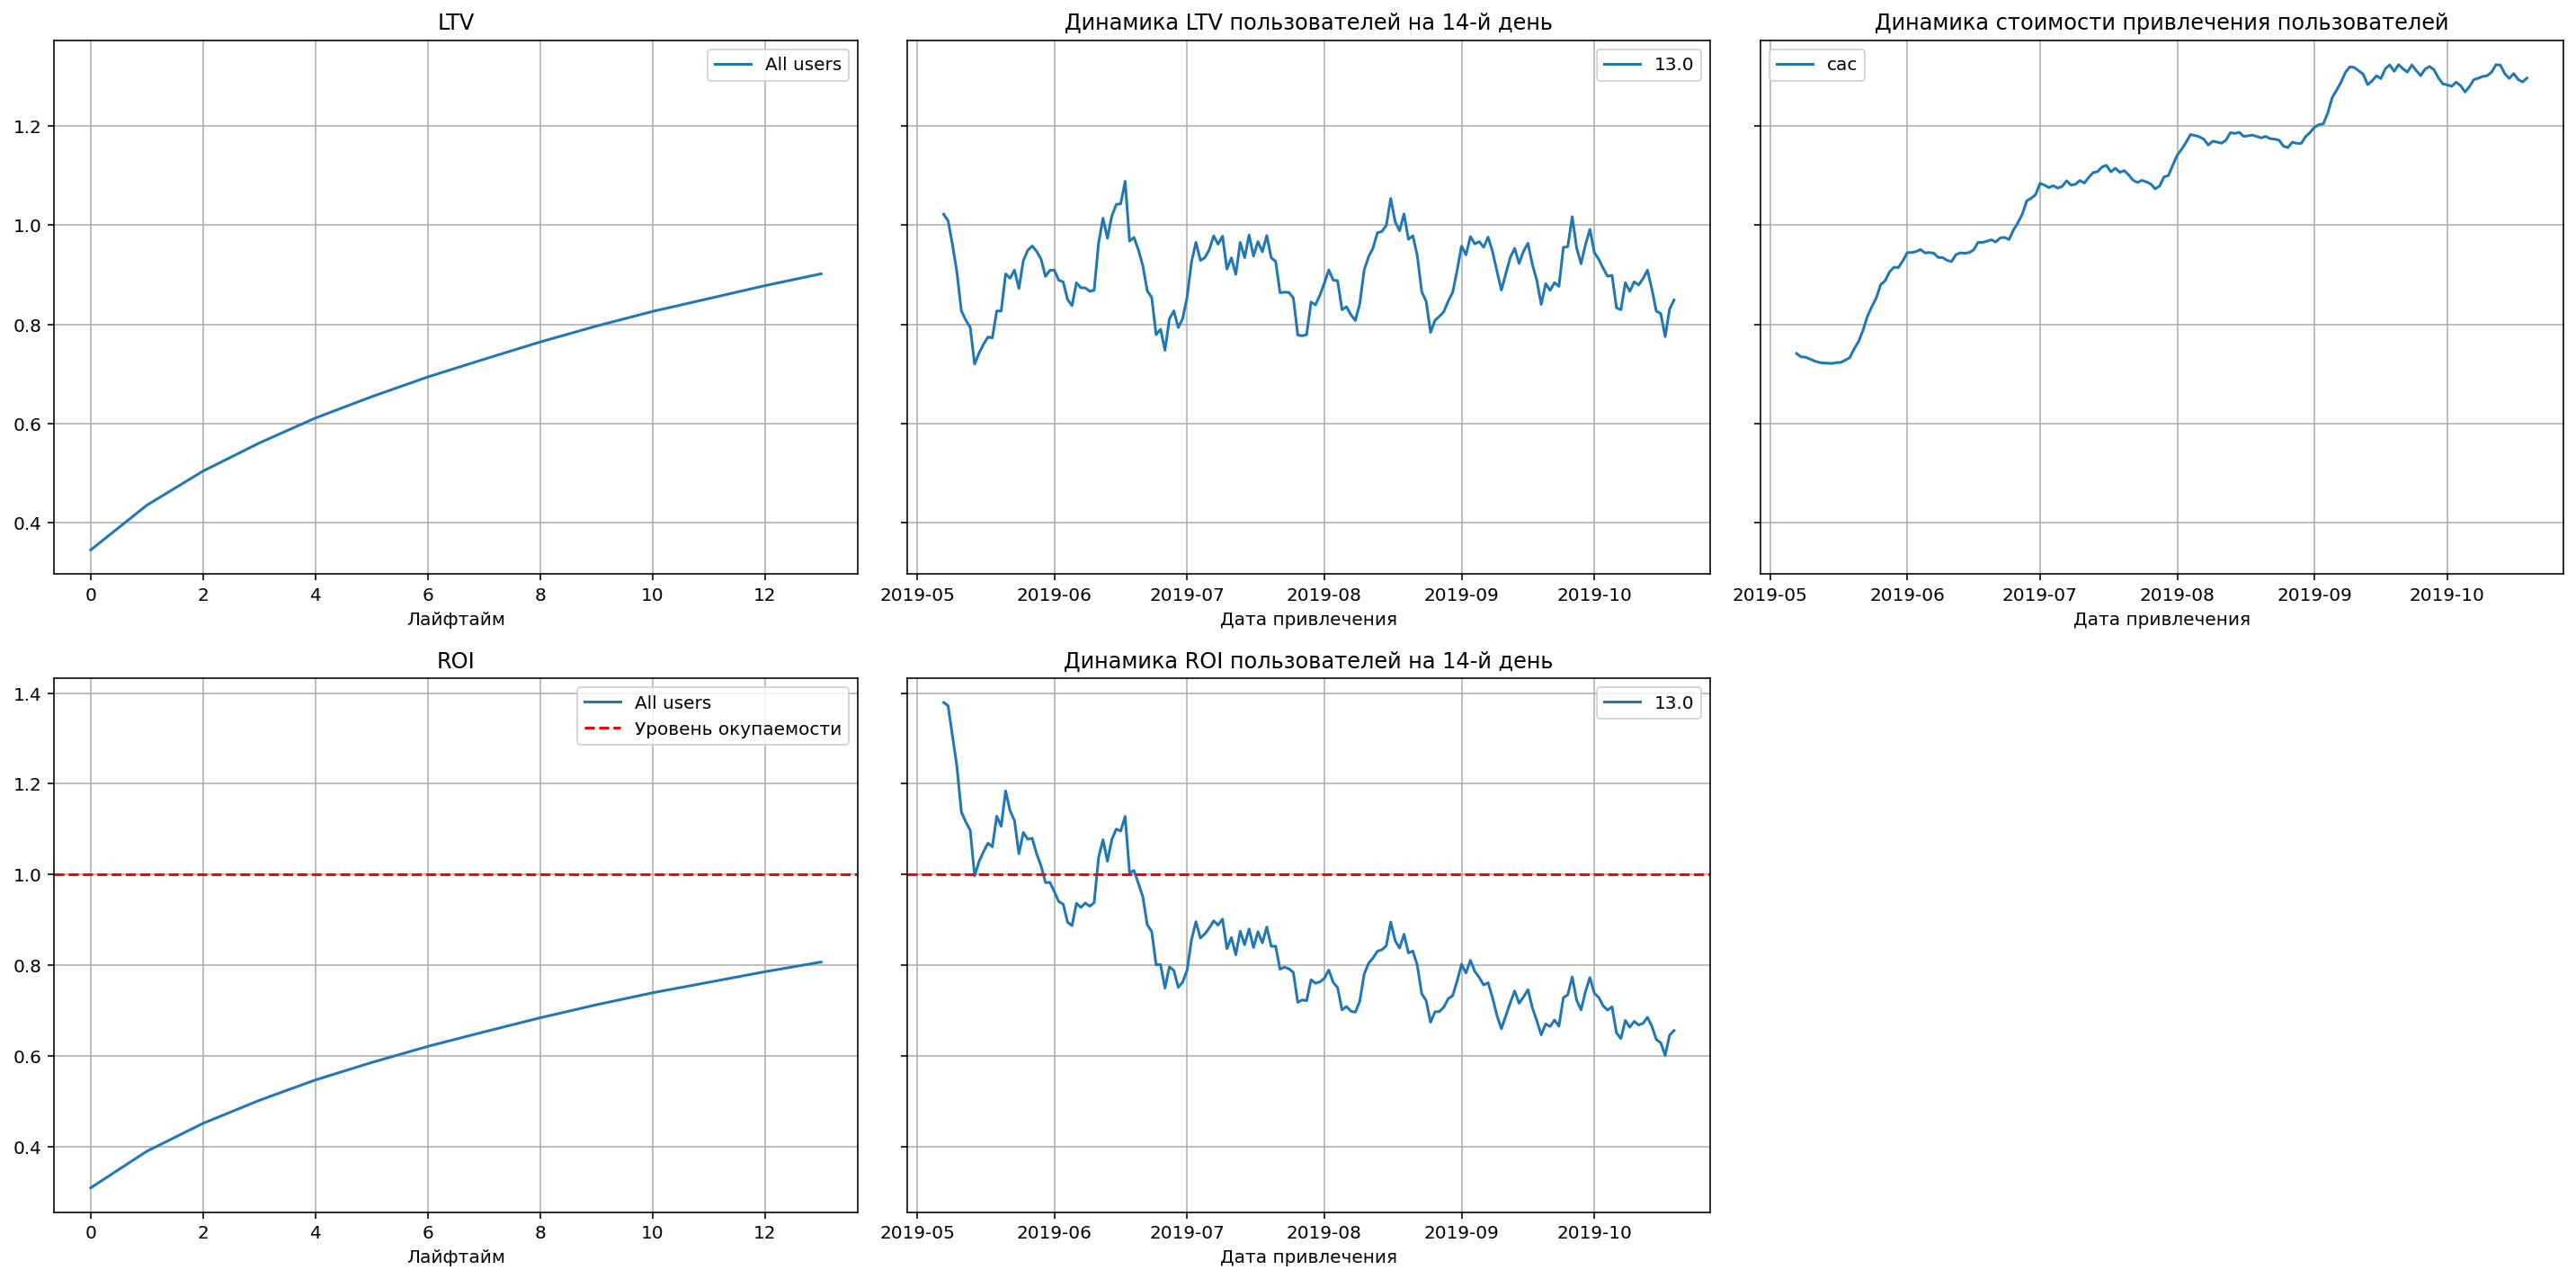

In [33]:
# выводим соответствующие графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon) 

**Промежуточный вывод:**
- за весь отчетный период наблюдается спад окупаемости(ROI),
- на графике ROI заметно, что на протяжении 2-х недельного лайфтайма пользователи не доходят до уровня окупаемости примерно 20%,
- сильно дорожает стоимость привлечения пользователей на протяжении всего периода.

Проверим конверсию и удержание пользователей и динамику их изменения. Построим и изучим графики конверсии и удержания.

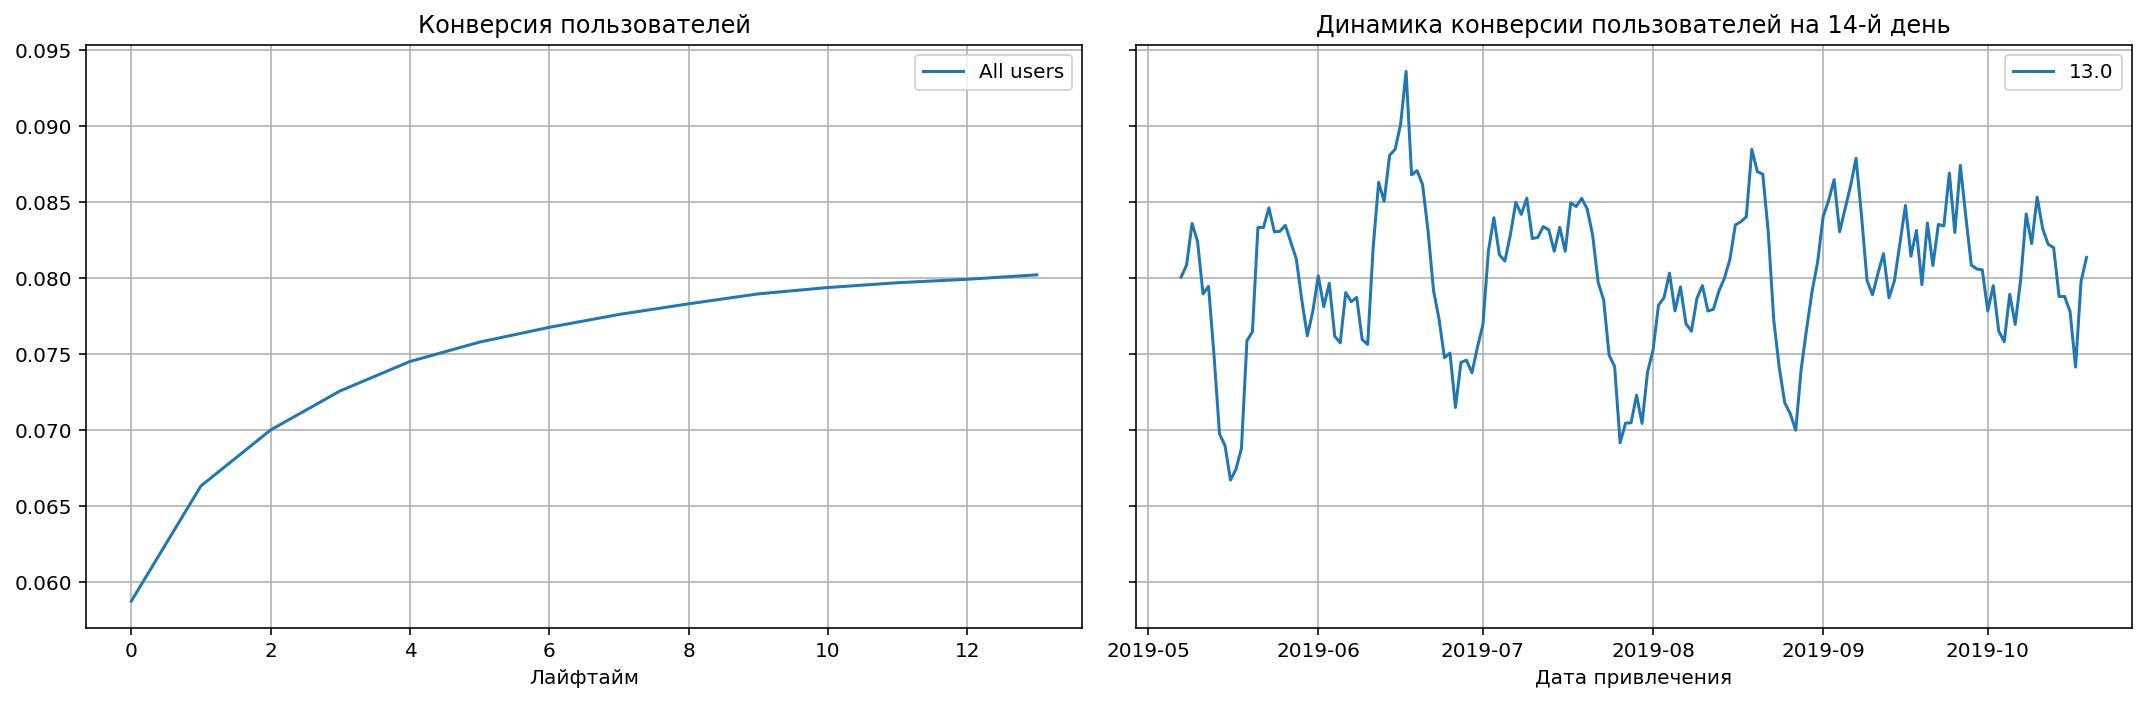

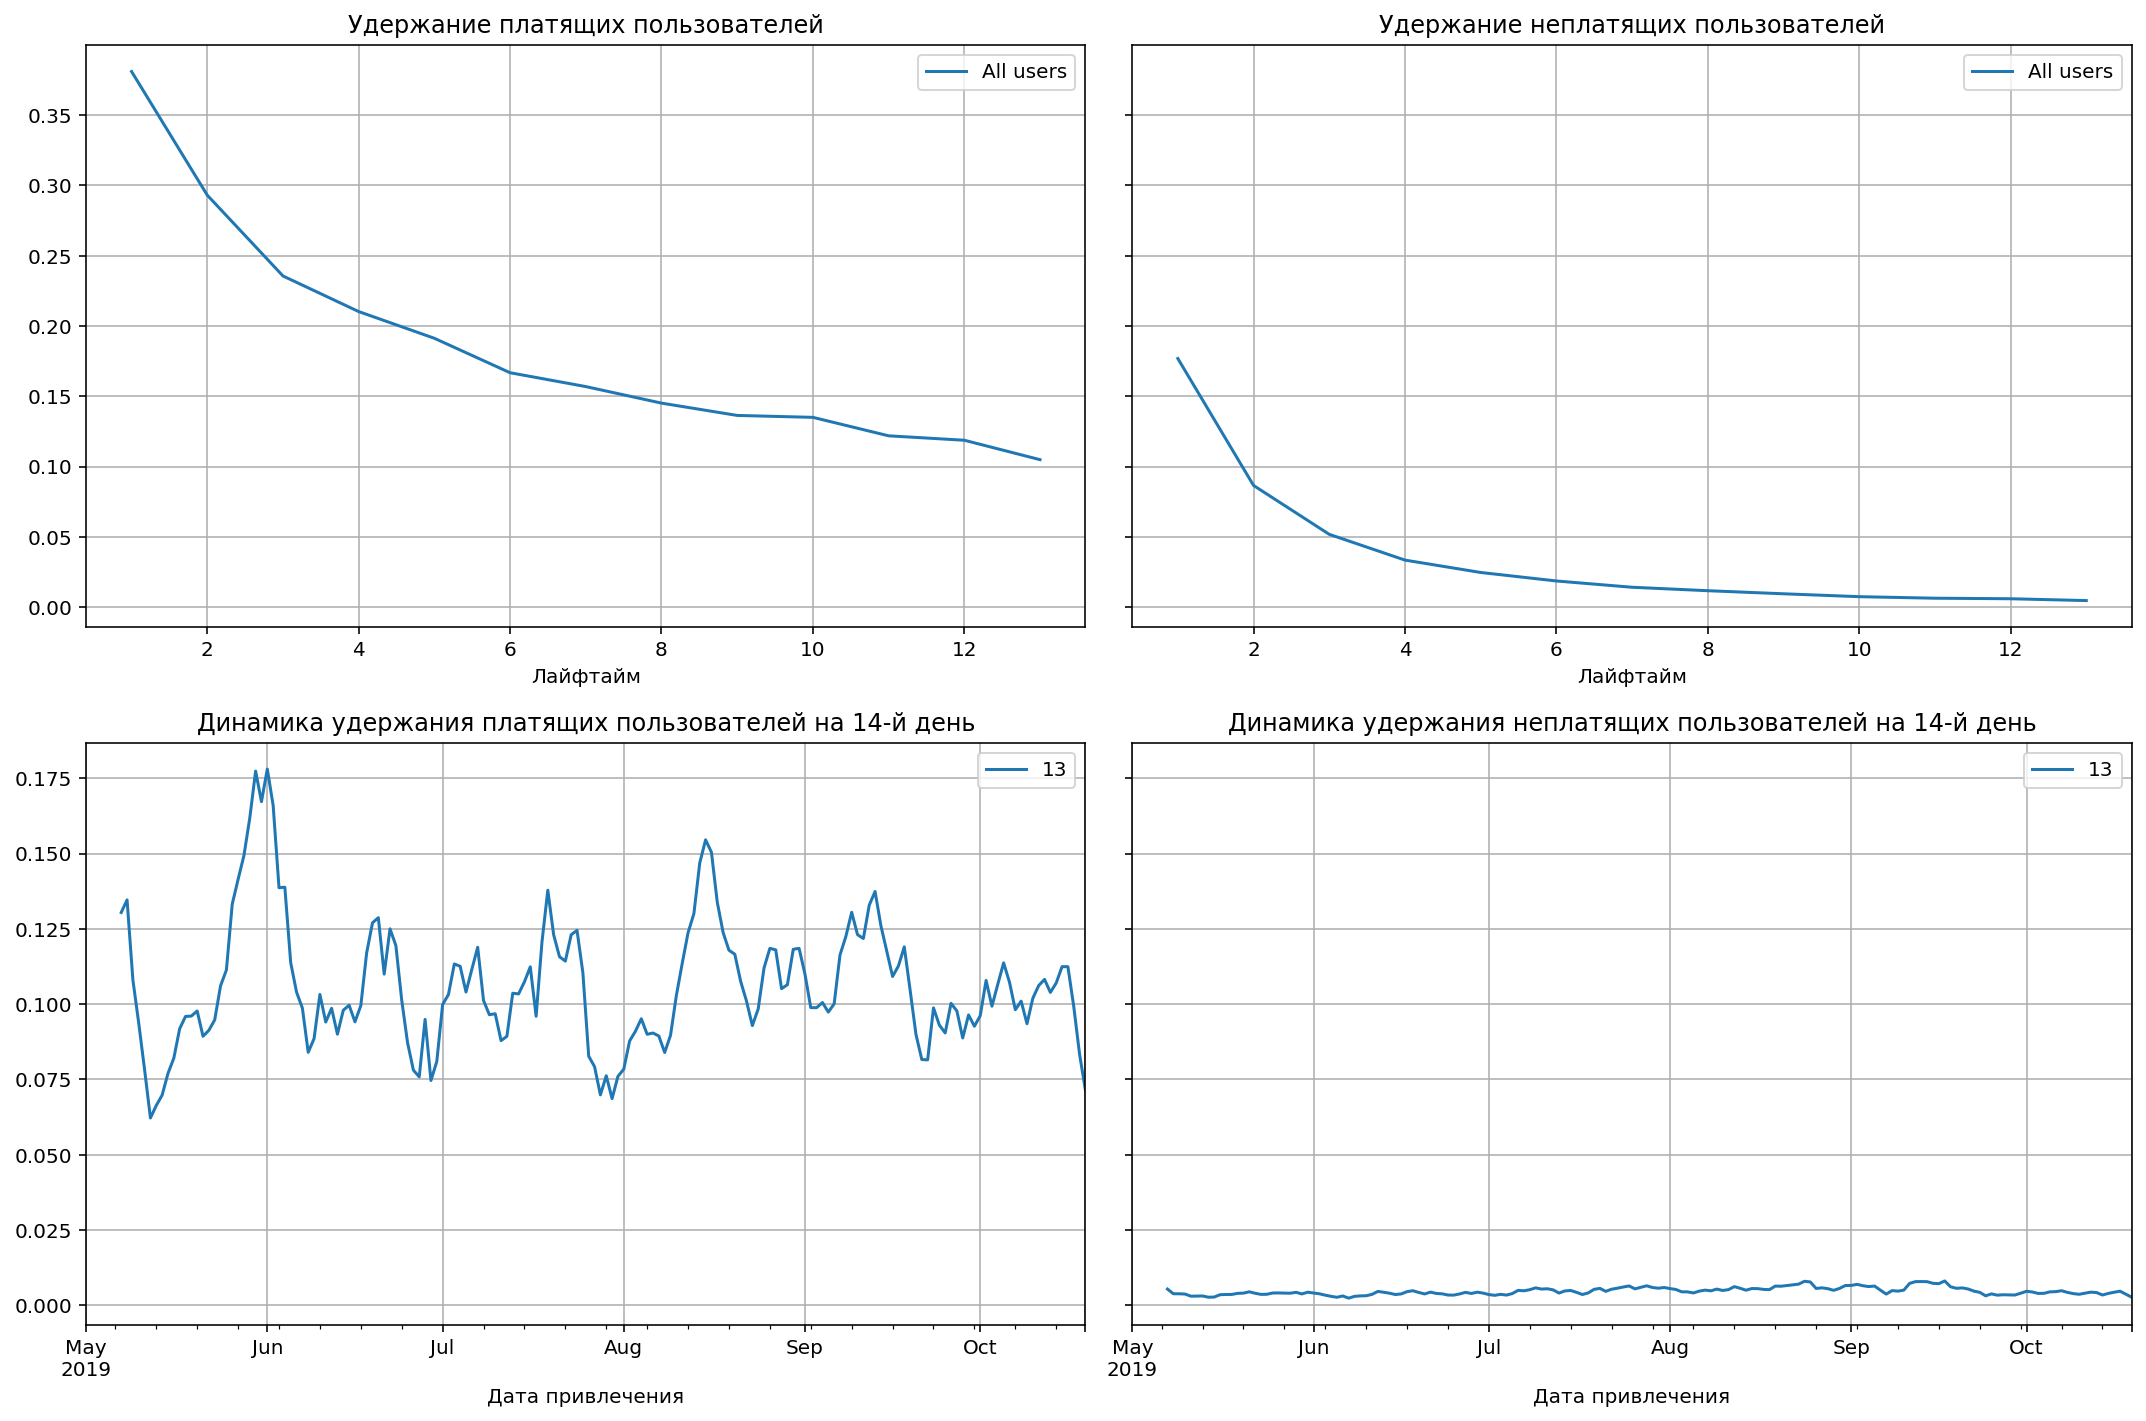

In [34]:
# посчитаем конверсию и ретеншн
# построим их графики
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=[]
)

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=[]
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon) 
plot_retention(retention_grouped, retention_history, analysis_horizon)

**Промежуточный вывод:**
- в среднем к 14-му дню лайфтайма пользователя, в категорию платящих переходит 8% пользователей, что можно считать хорошим показателем;
- динамика конверсии пользователей отображает конверсию между 6.6% и 8.7% и в среднем находится на хорошем уровне;
- динамика удержания платящих пользователей на 14-й день отображает, что примерно 11% пользователей продолжают использовать продукт, а неплатящих в районе 1%.

Проверим конверсию пользователей и динамику её изменения в разбивке по странам/каналам/устройствам. Построим и изучим графики конверсии.

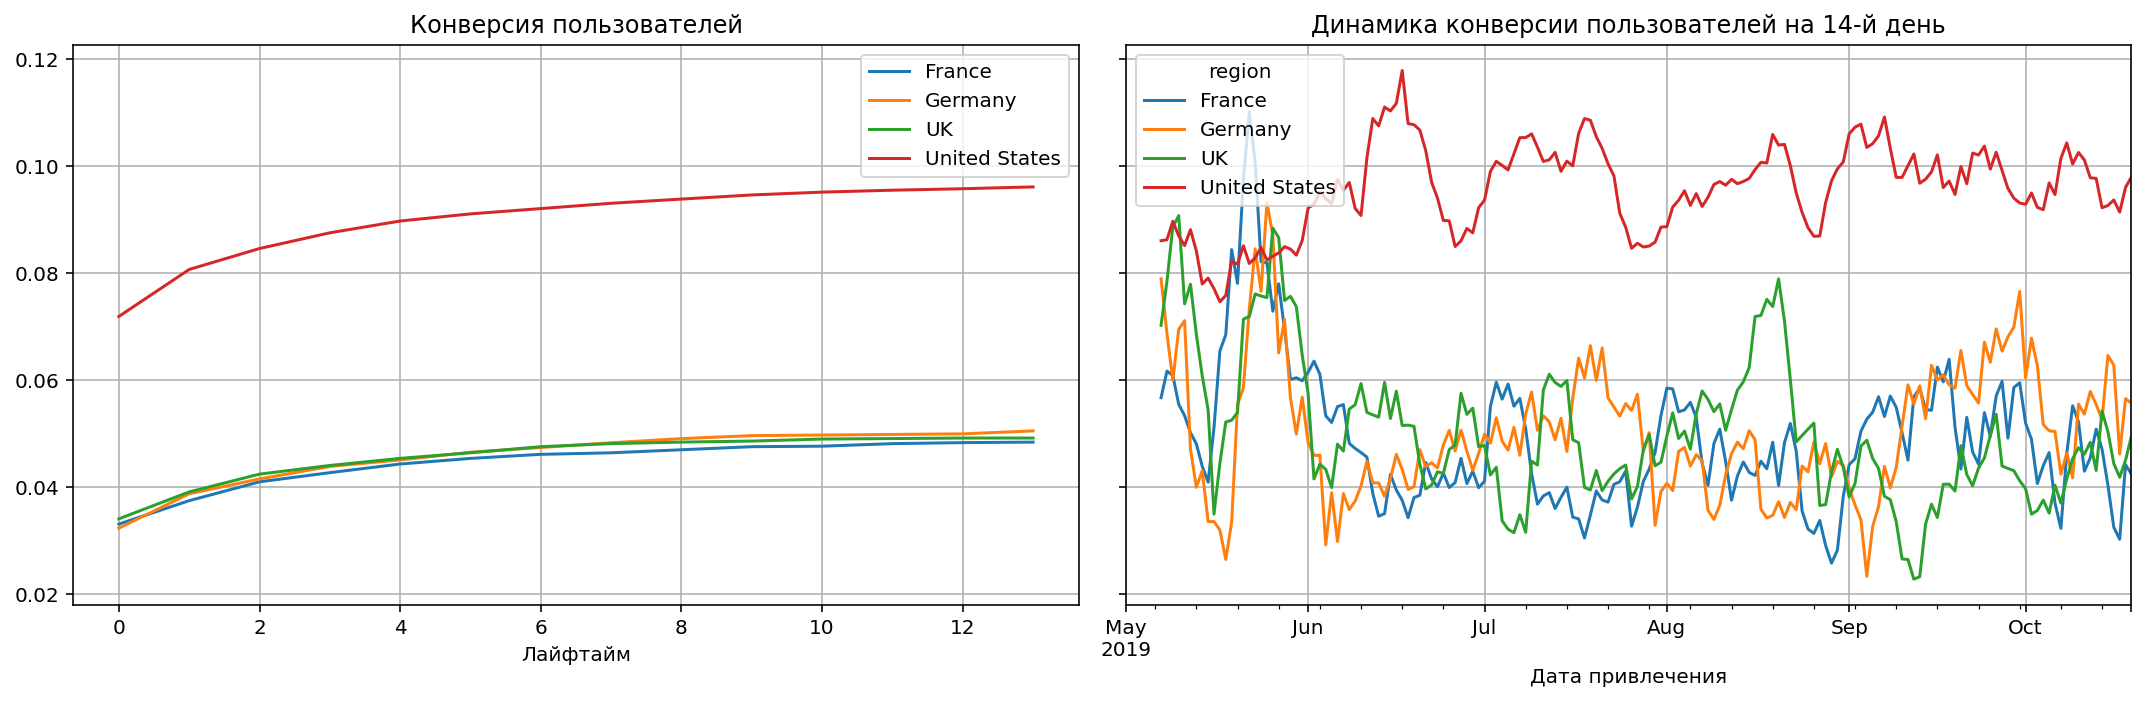

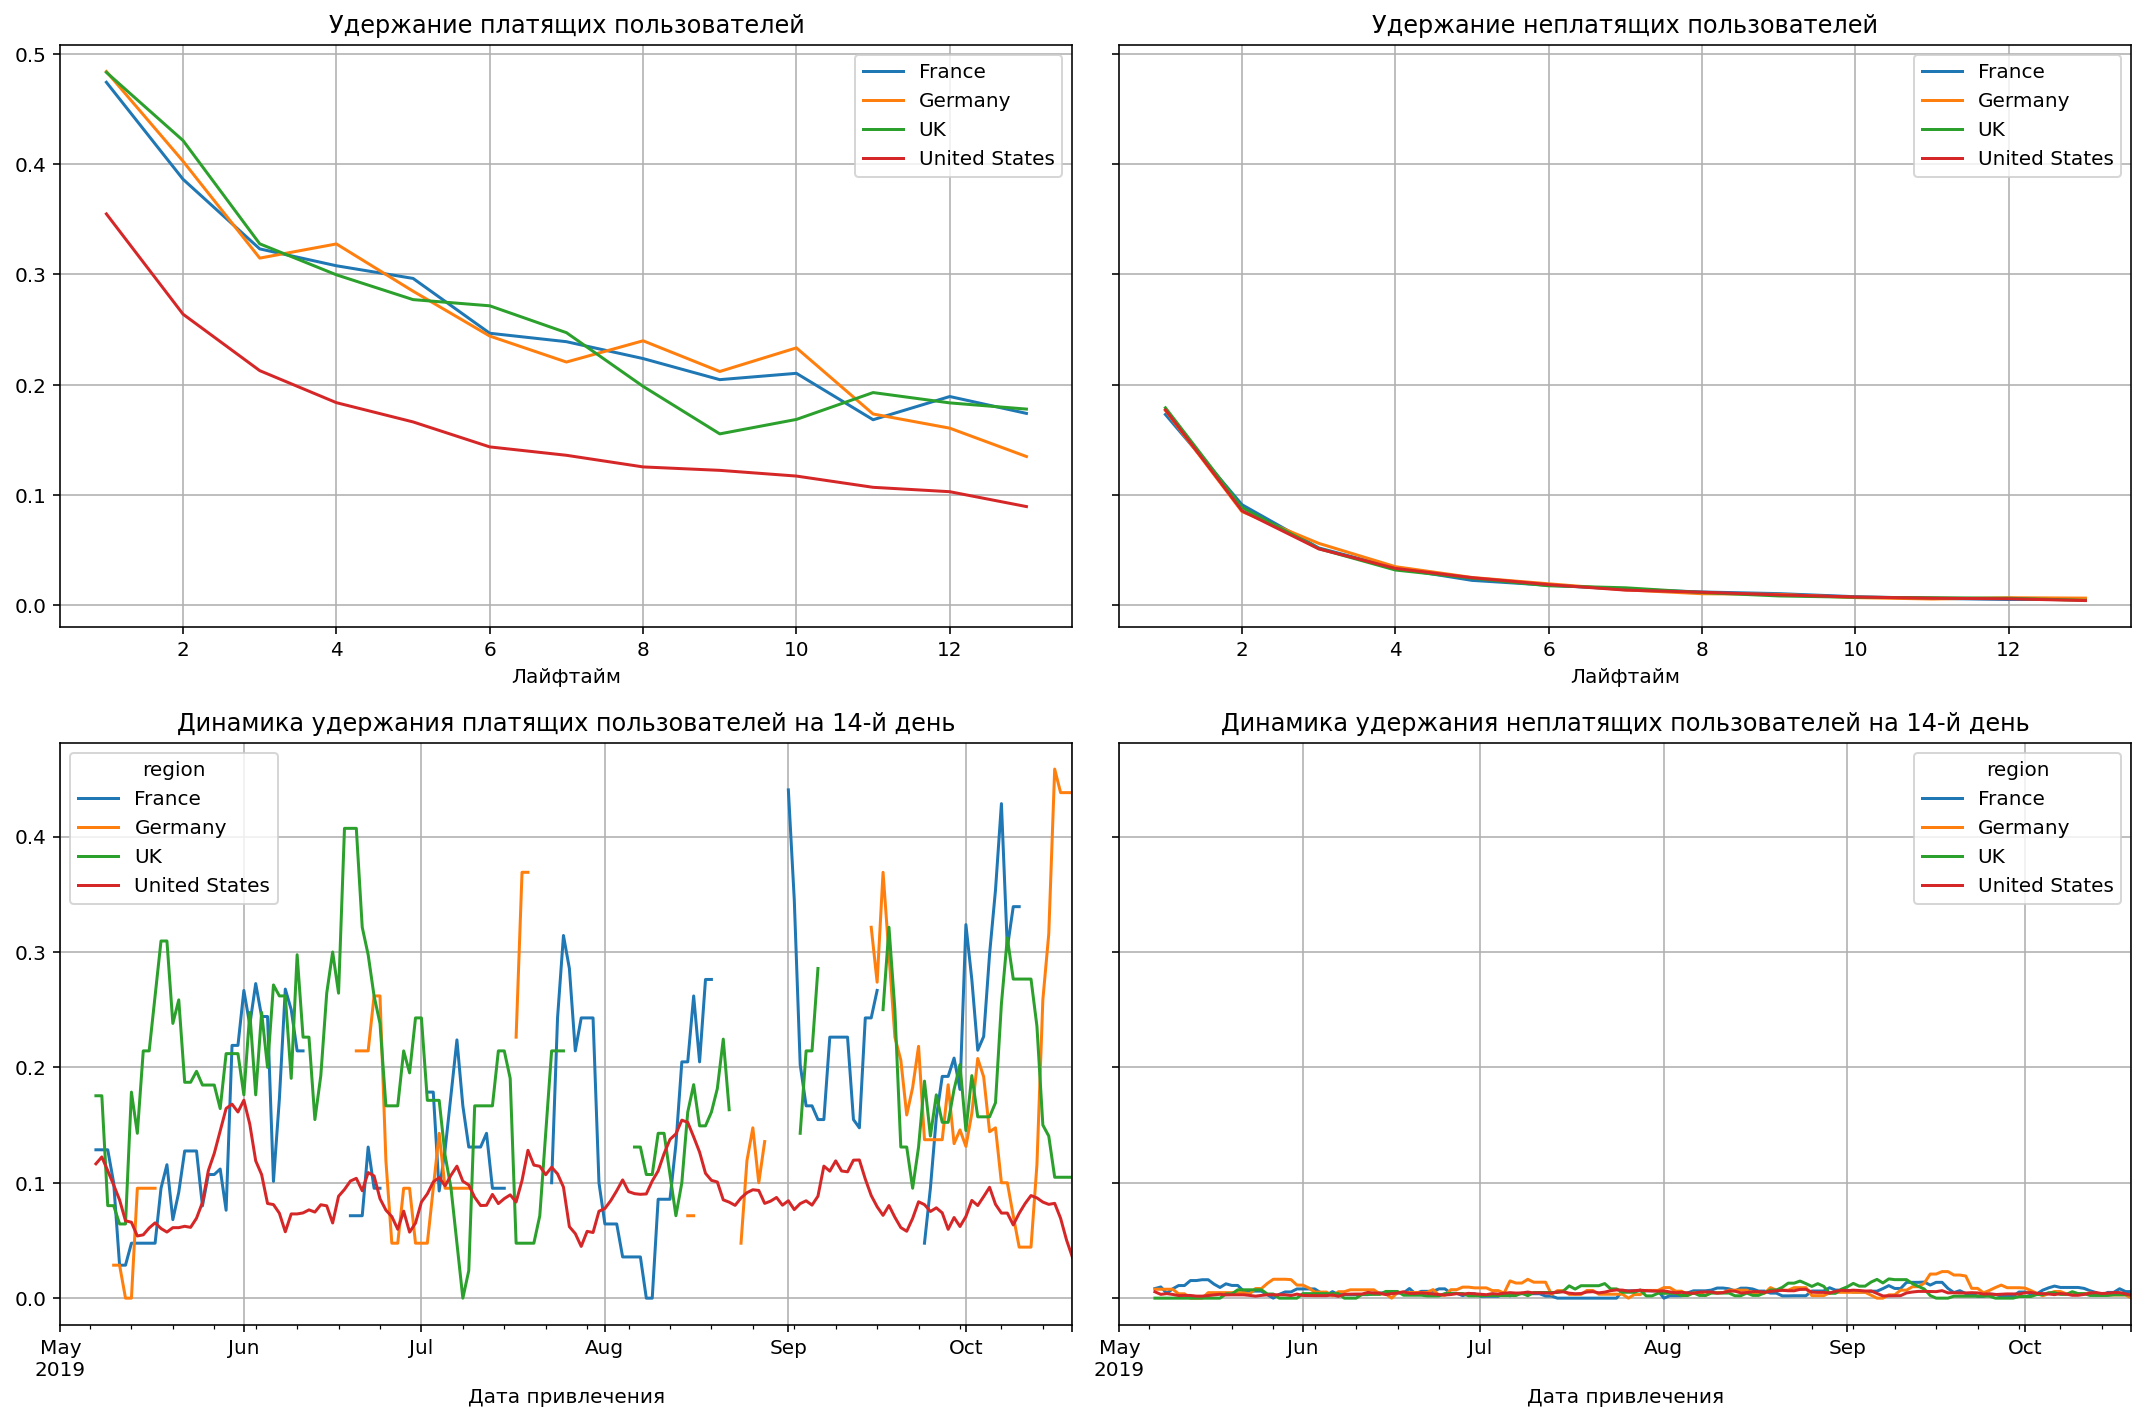

In [35]:
# посчитаем конверсию и ретеншн по регионам
# построим их графики
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=['region']
)

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon) 
plot_retention(retention_grouped, retention_history, analysis_horizon)

**Промежуточный вывод:**
- из двух графиков конверсии больше всего в положительную сторону выделяется американский сегмент пользователей, конверсия у таких клиентов значительно больше чем у других и составляет примерно 9.5%;
- при этом удержание платящих пользователей из США на 14-й день меньше чем у других регионов и находится на уровне 10%;
- удержание неплатящих пользователей по всем регионам примерно совпадает.

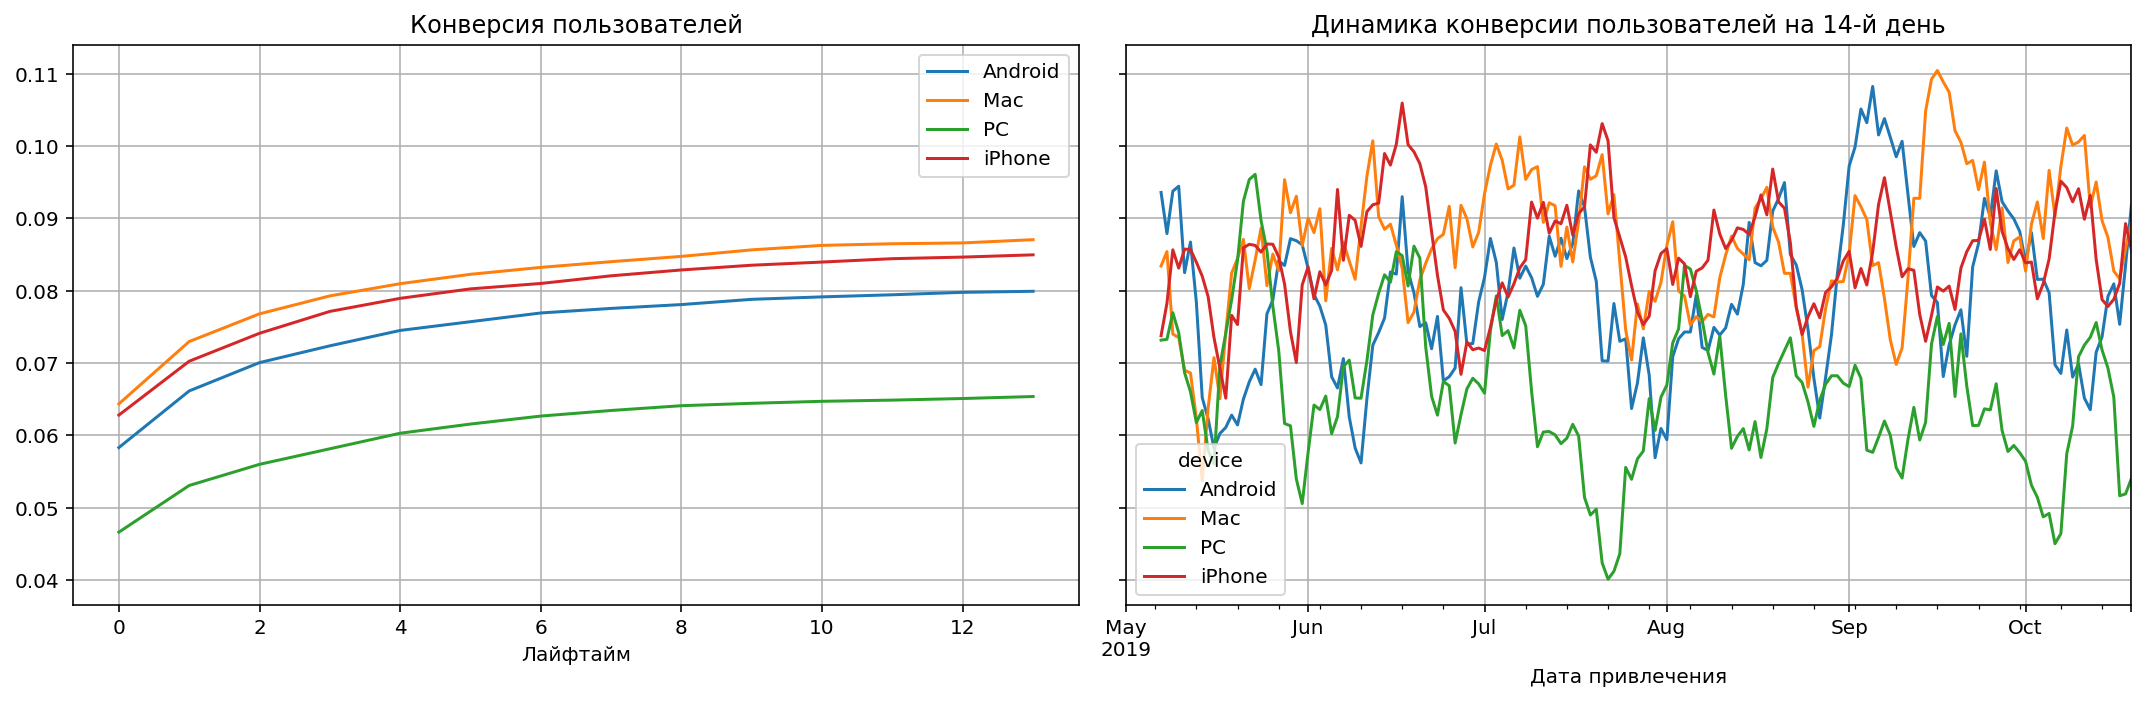

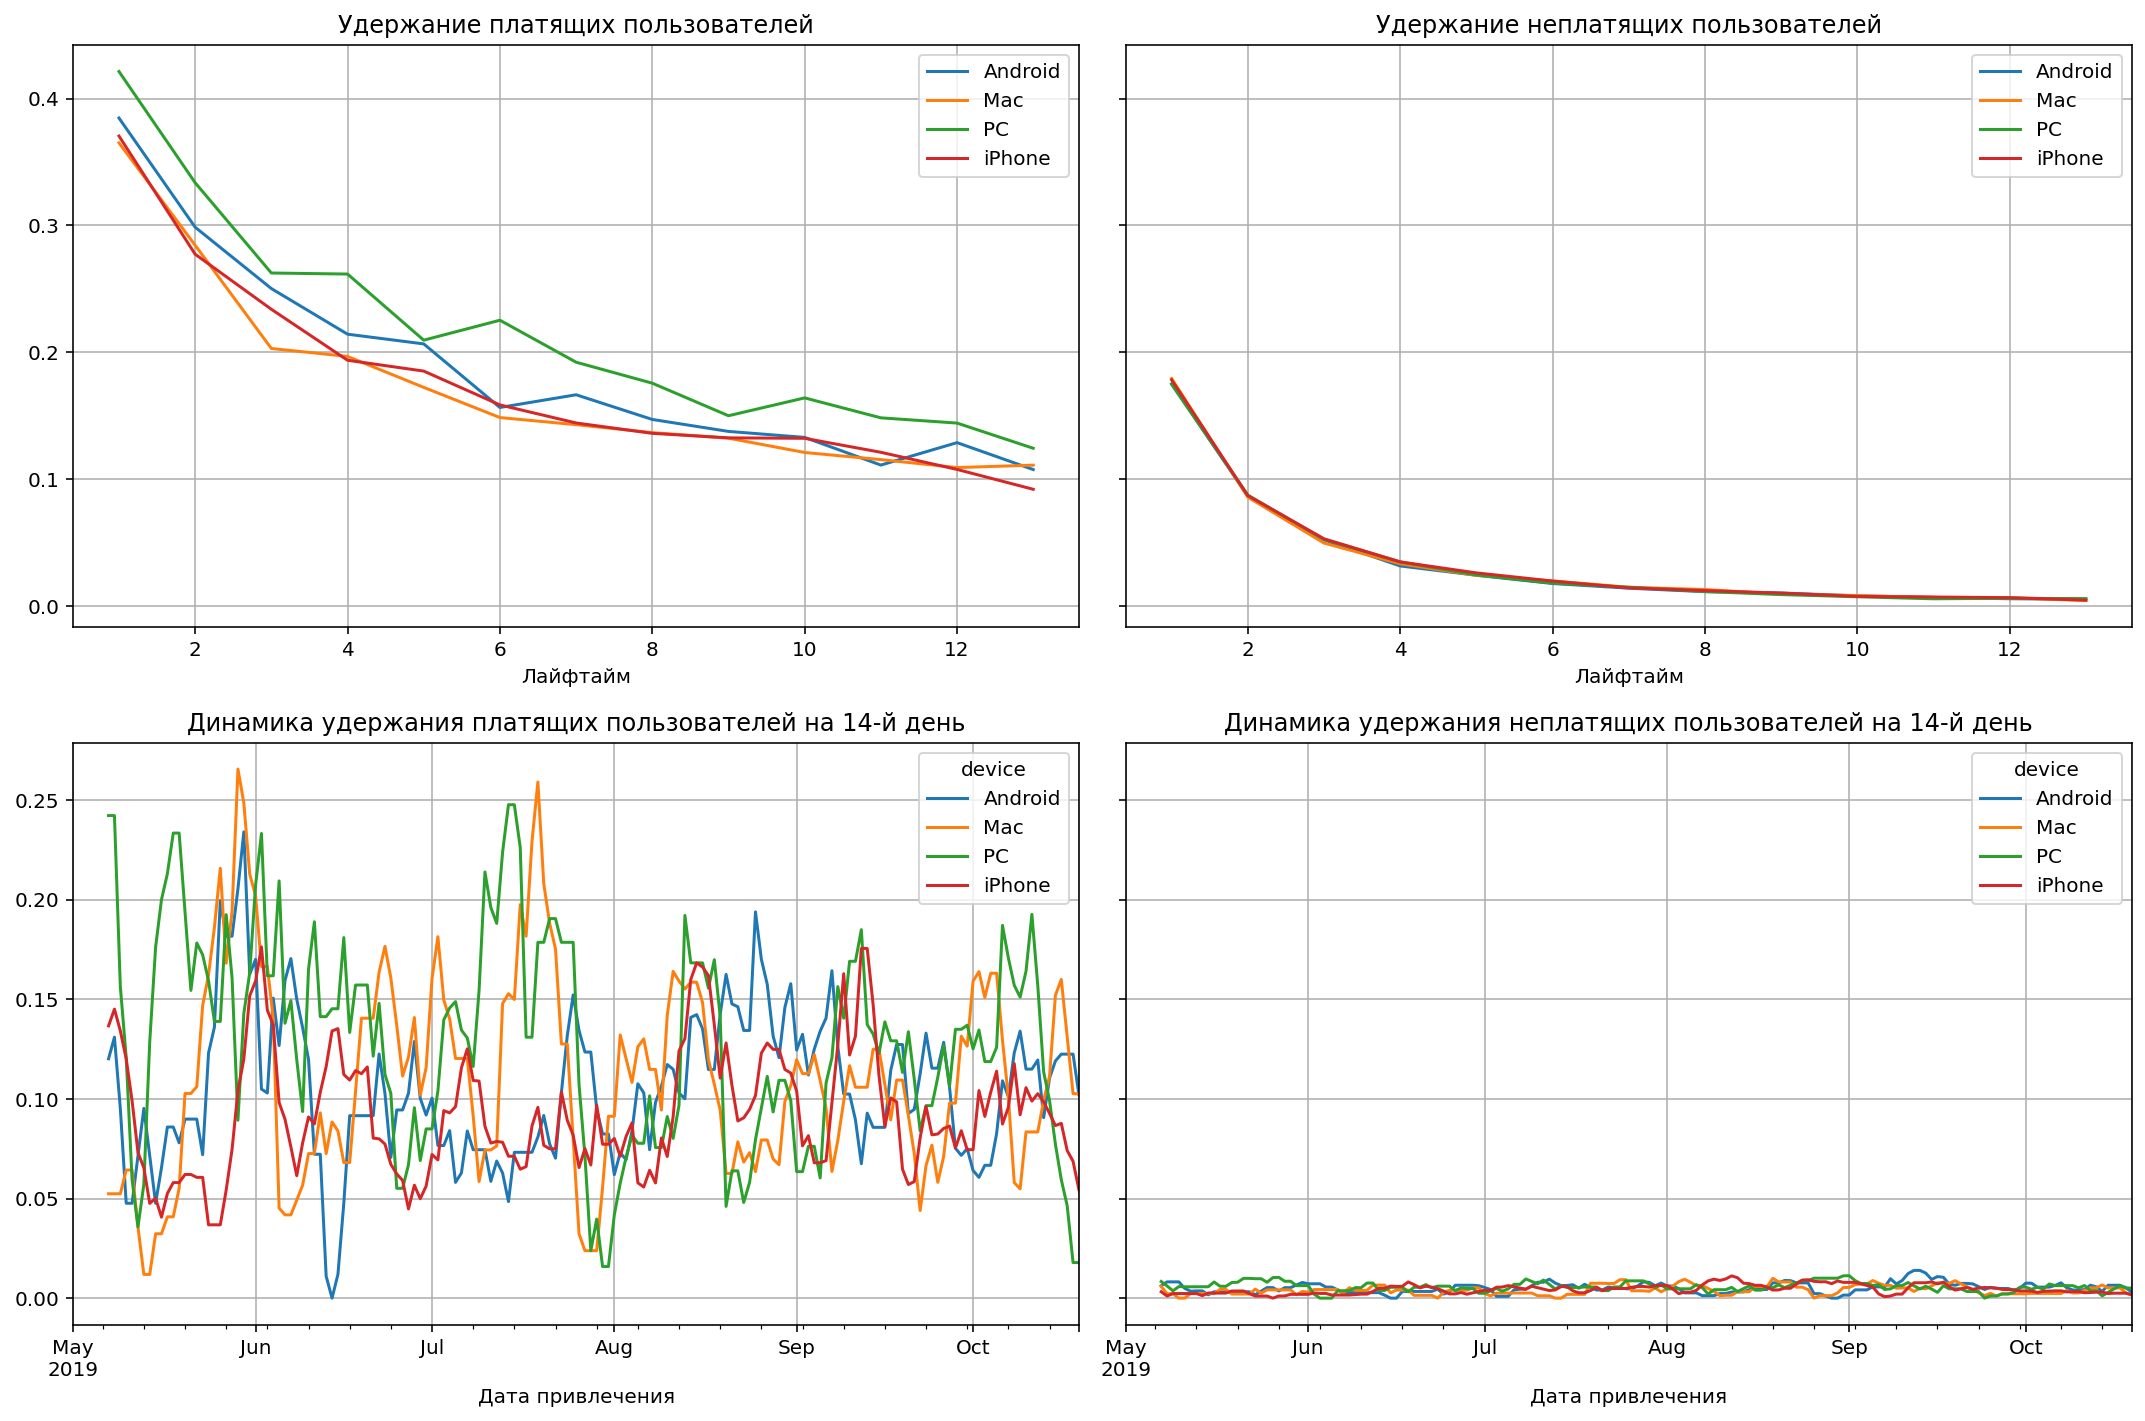

In [36]:
# посчитаем конверсию и ретеншн по устройствам
# построим их графики
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=['device']
)

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon) 
plot_retention(retention_grouped, retention_history, analysis_horizon)

**Промежуточный вывод:**
- у платформ Mac и iPhone наблюдается хорошие показатели конверсии на уровне 8.7% и 8.5%;
- меньше всего конверсия у пользователей с PC и она составляет около 6.5%, при том что удержание платящих пользователей на PC немного выше чем у других платформ;
- удержание неплатящих пользователей на всех платформах практически совпадает;
- удержание платящих пользователей также меняется примерно одинаково, но средний уровень меньше всего у iPhone.

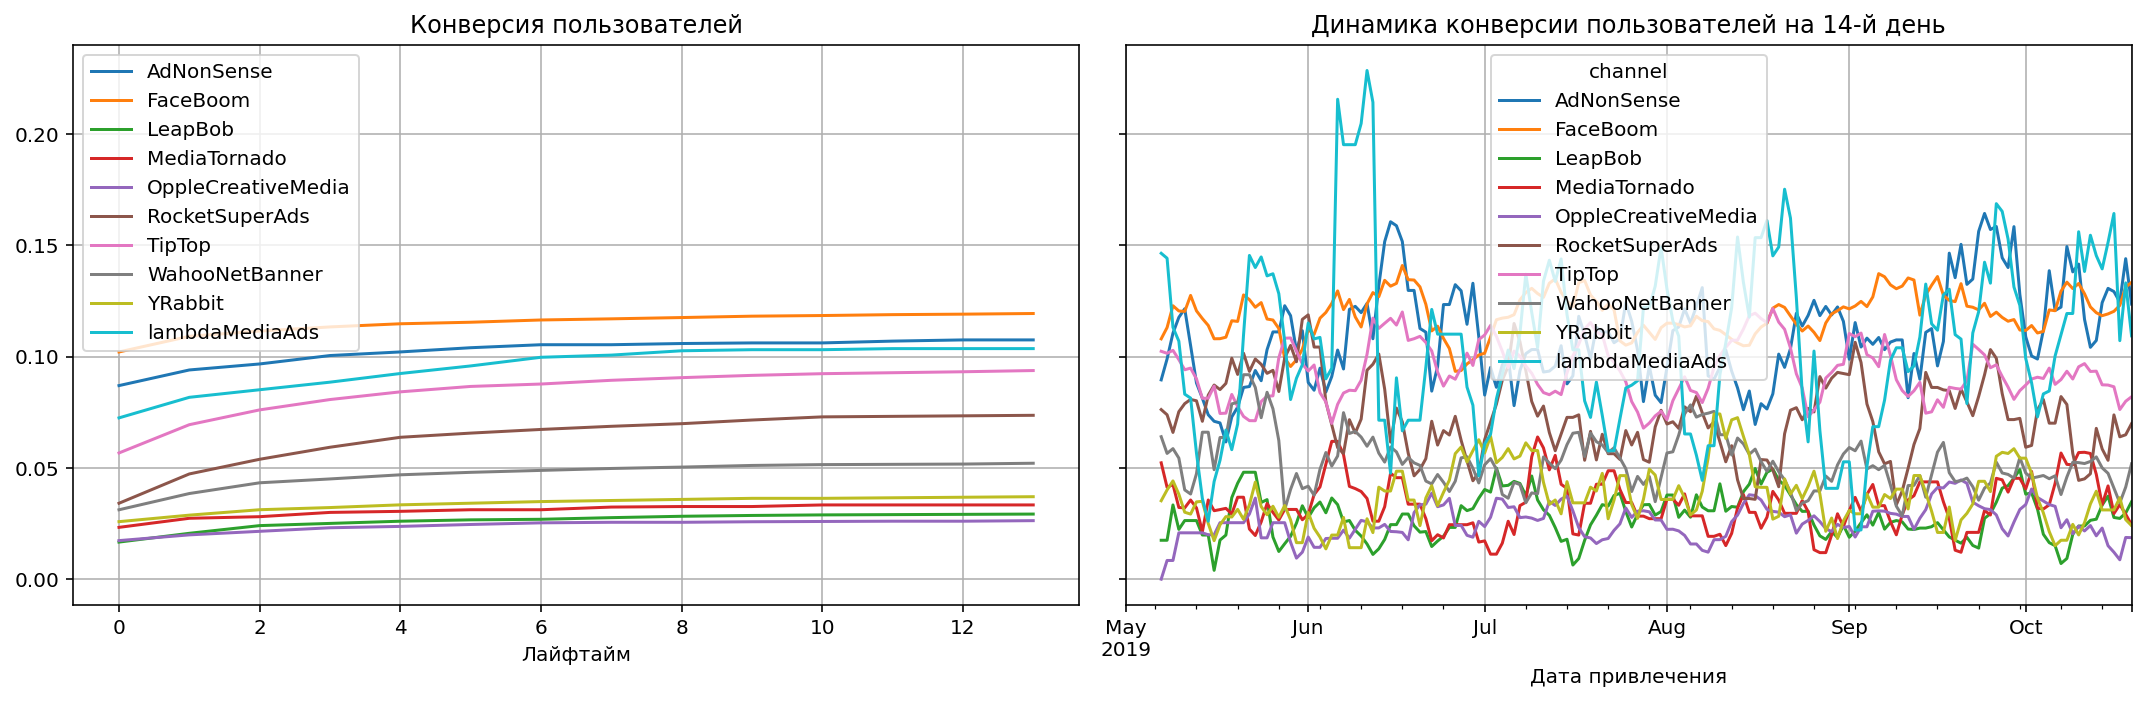

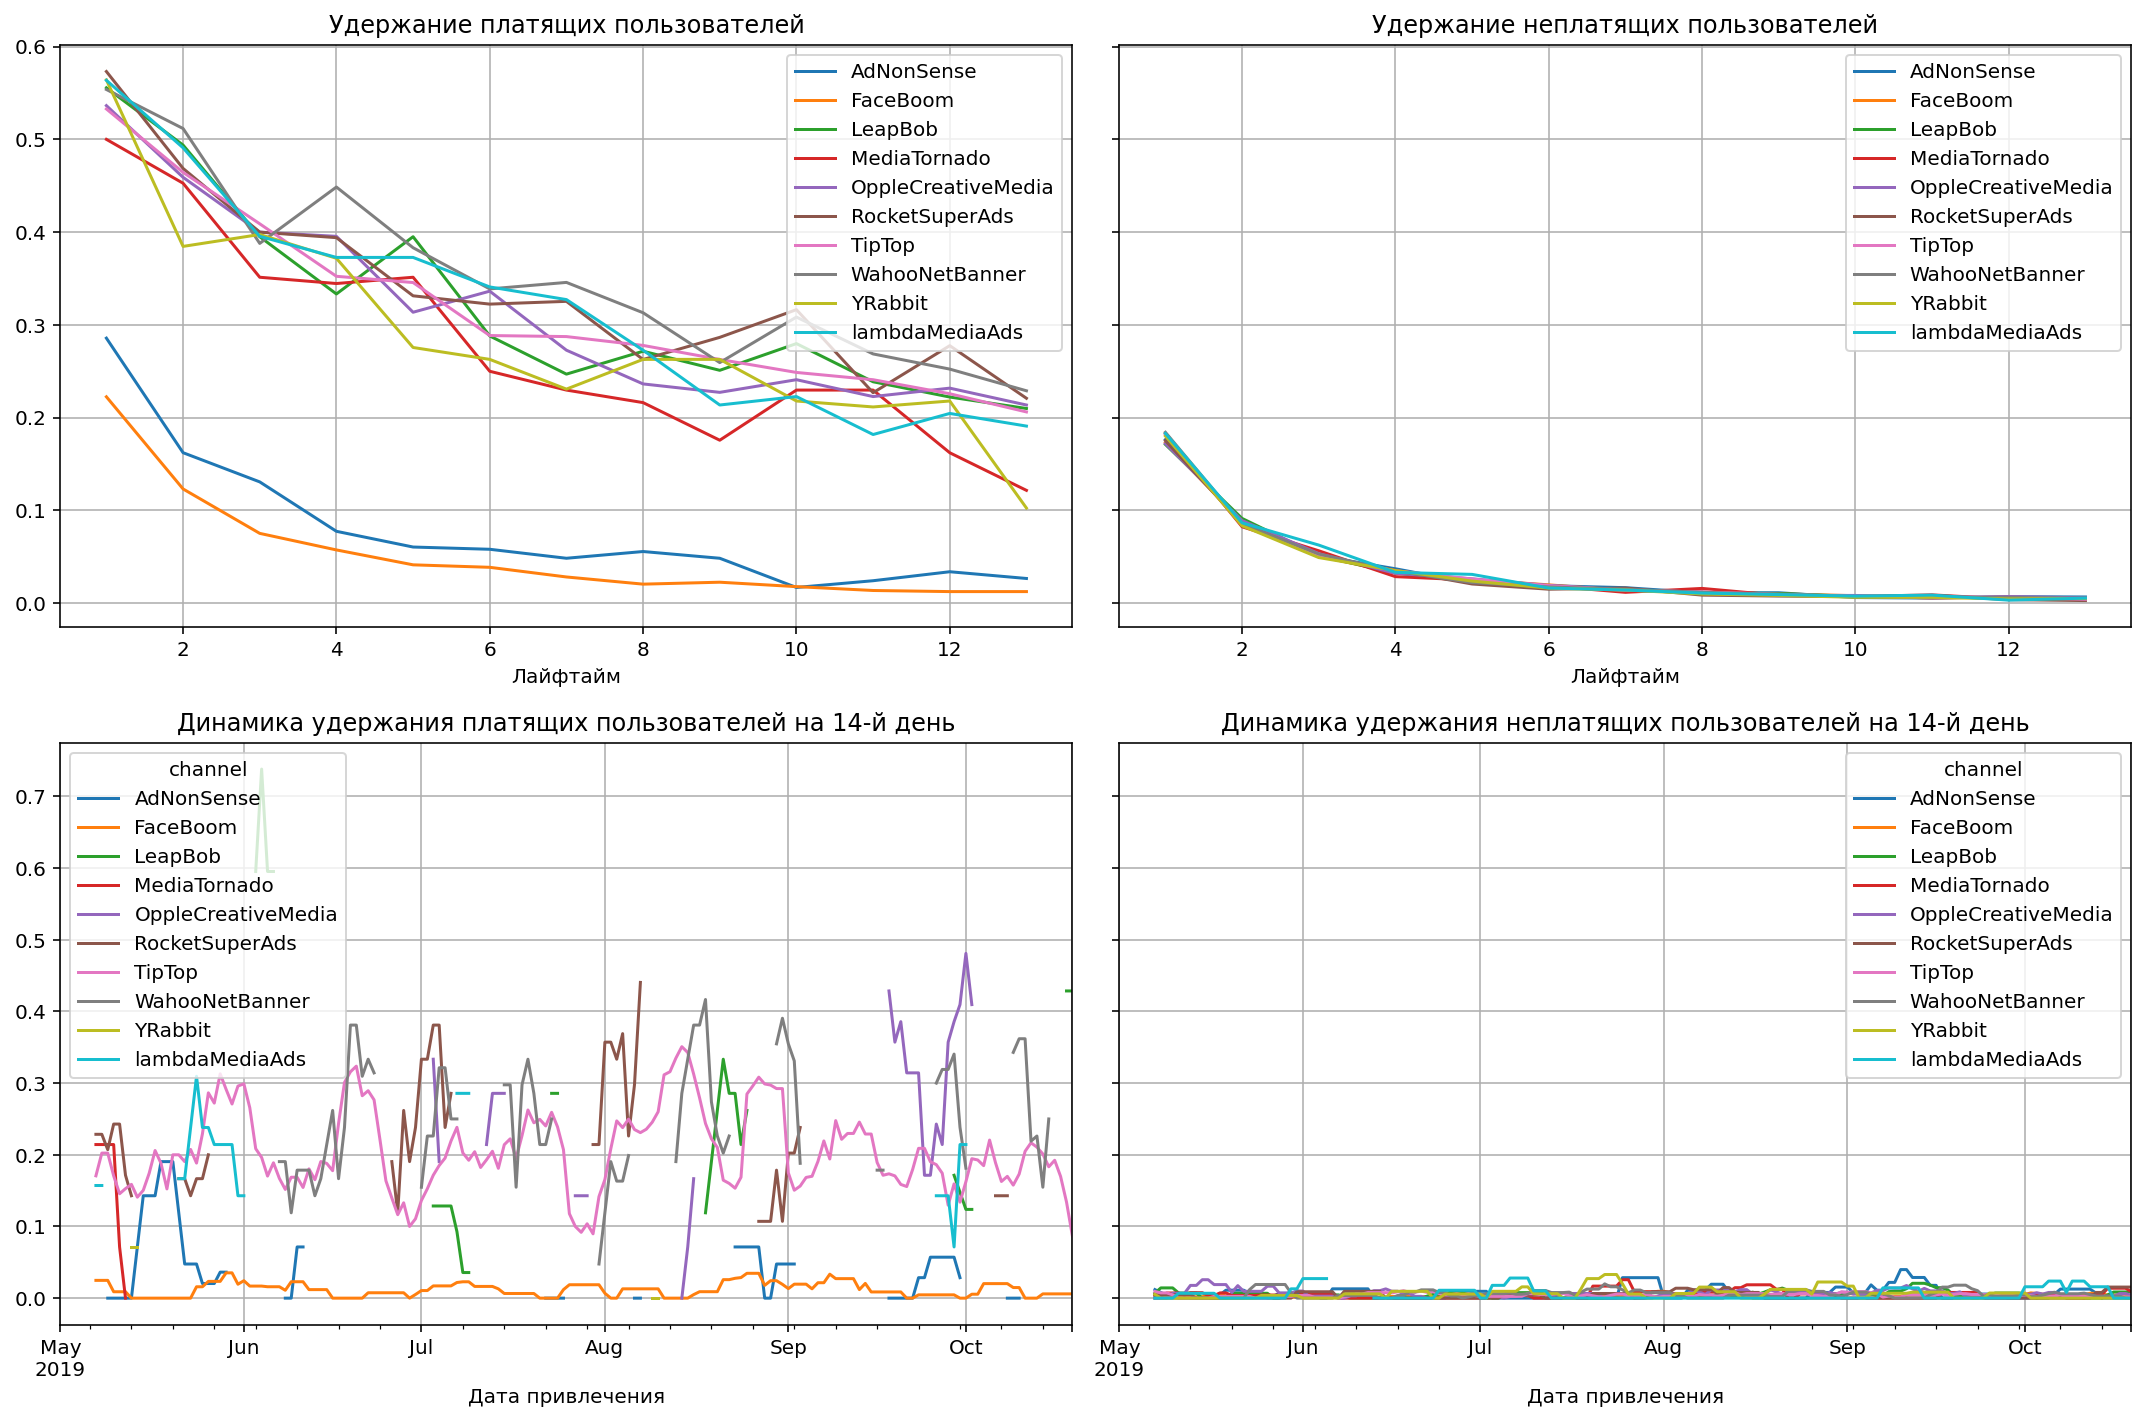

In [37]:
# посчитаем конверсию и ретеншн по каналам привлечения
# построим их графики
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=['channel']
)

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon) 
plot_retention(retention_grouped, retention_history, analysis_horizon)

**Промежуточный вывод:**
- на графиках динамики удержания пользователей на 14-й день некоторые каналы могут отображаться прерываемыми линиями, поскольку в них инвестировали не на протяжении всего отчетного периода;
- в лучшую сторону по конверсии пользователей и динамики конверсии пользователей на 14-й день выделяются каналы: *FaceBoom* (12%), *AdNonSense*(11%), *lambdaMediaAds*(10%) и *RocketSuperAds*(7%);
- при этом в плане удержания платящих пользователей и динамики удержания платящих пользователей на 14-й день хуже всего себя показывают каналы рекламы также *FaceBoom*(2%) и *AdNonSense* (3%);
- удержание неплатящих пользователей  и её динамика на 14-й день примерно одинаковы у всех каналов.

Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [38]:
# считаем ltv и roi
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = \
get_ltv(profiles, orders, observation_date, analysis_horizon, dimensions=['device'])

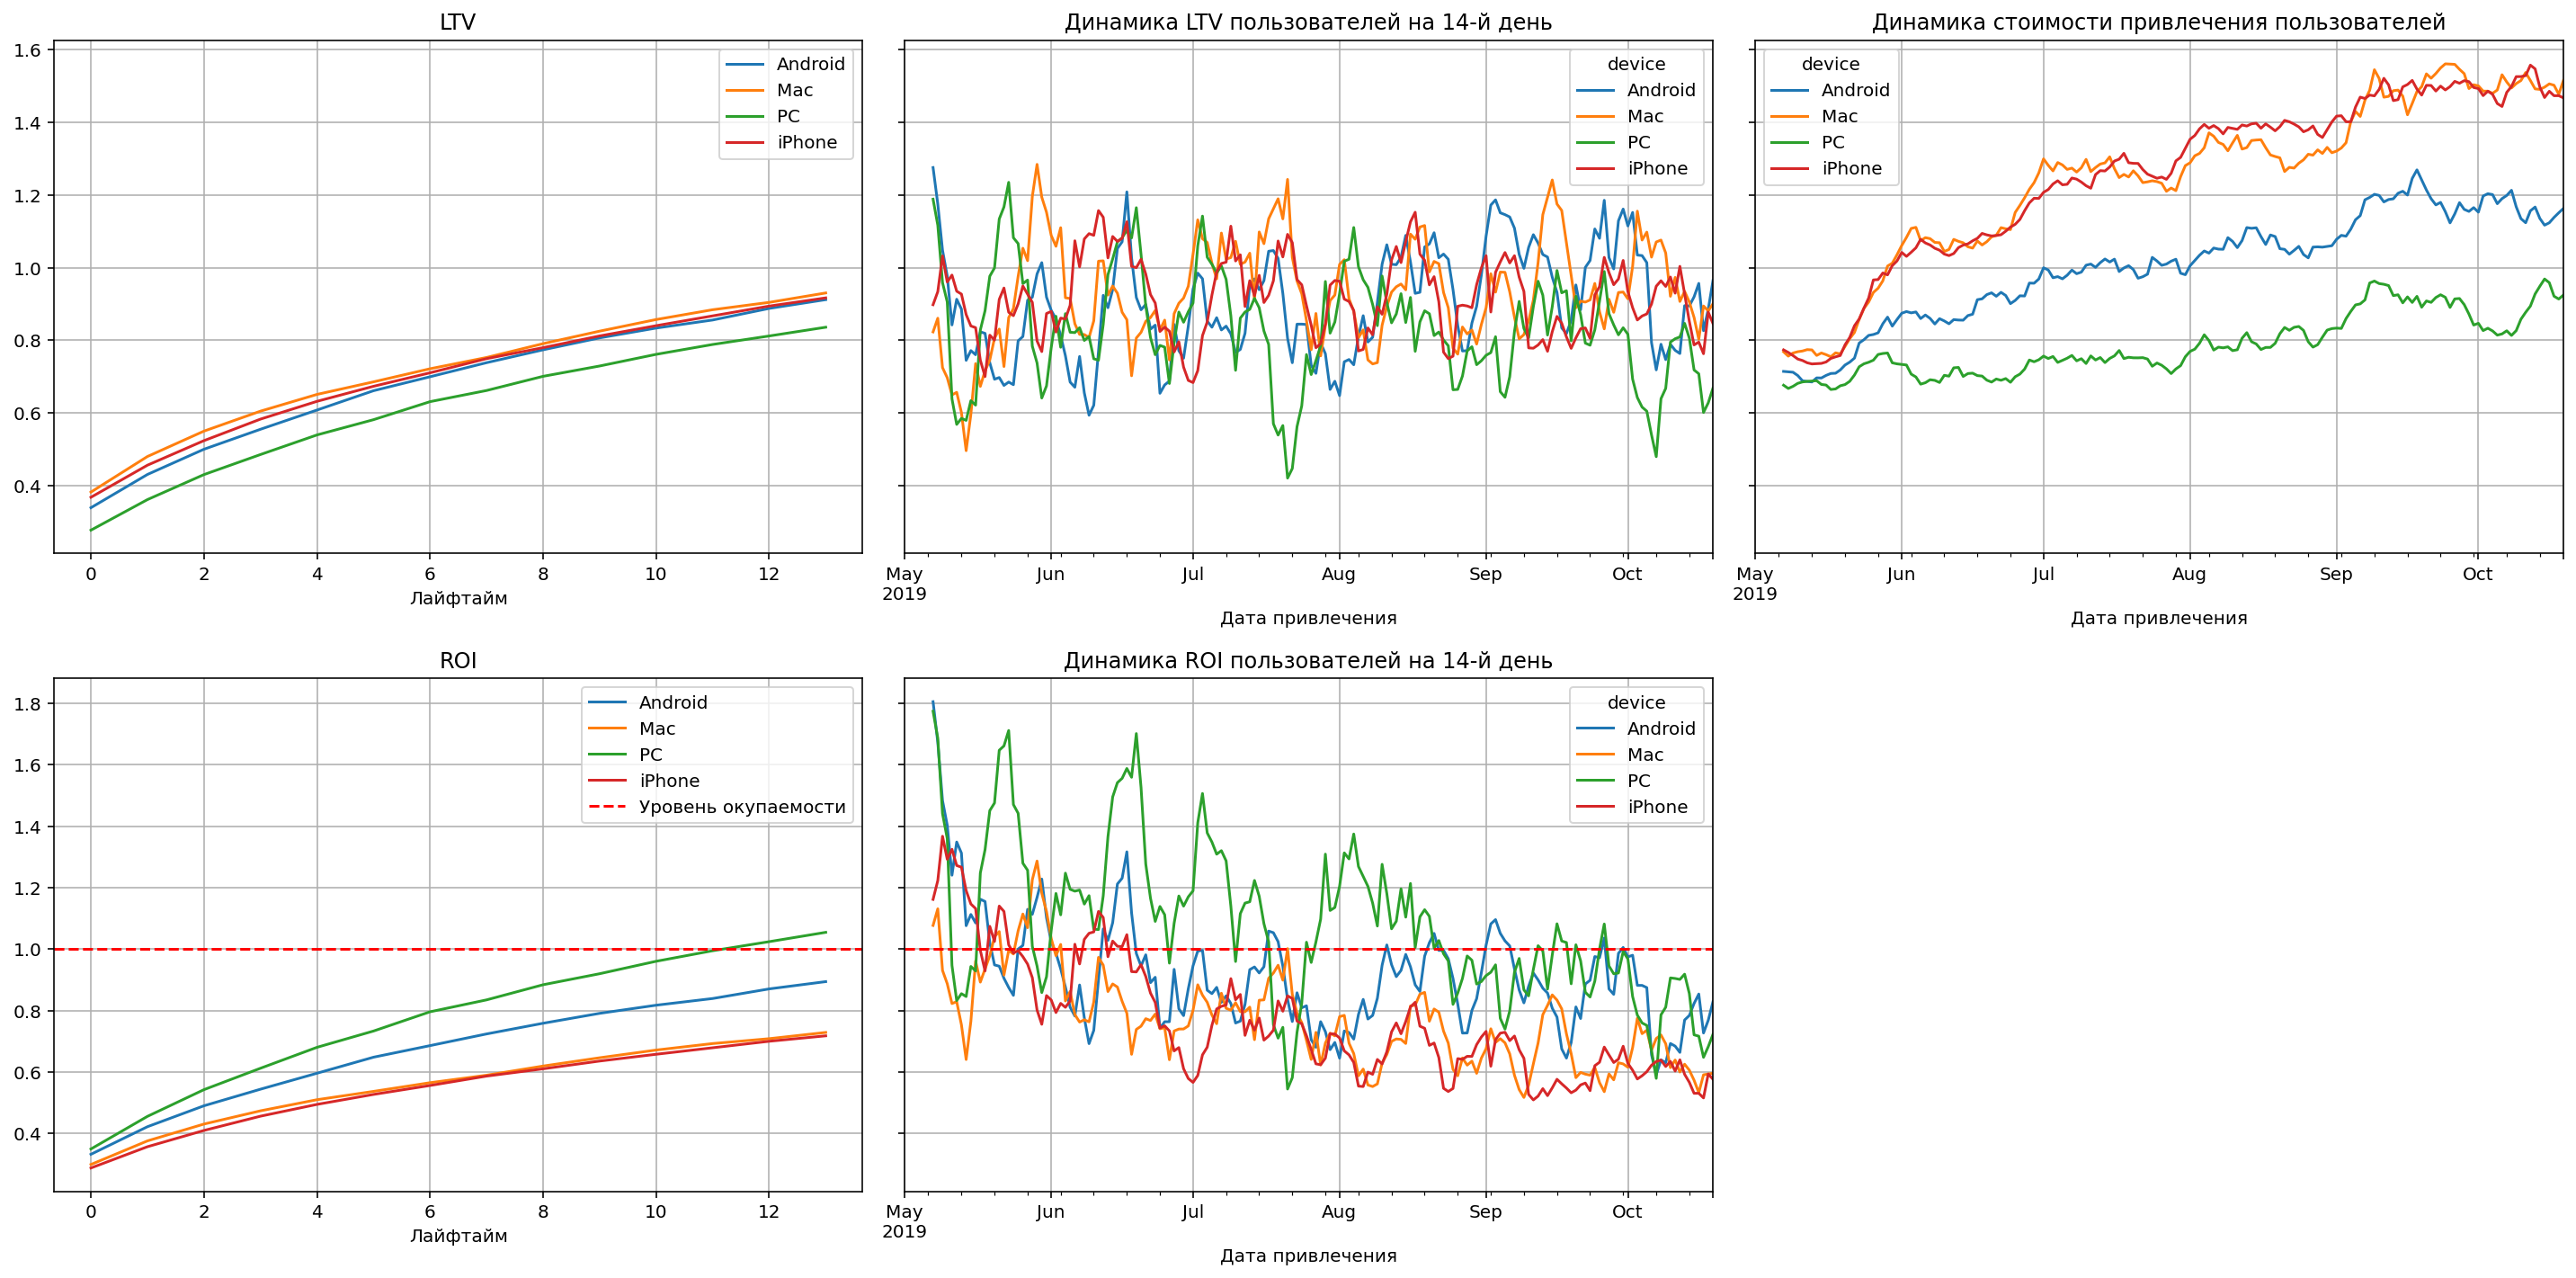

In [39]:
# выводим соответствующие графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon) 

**Промежуточный вывод:**
- как видно из графиков быстрее всего окупаются пользователи PC;
- мы также видим по ROI и динамике ROI пользователей на 14-й день что пользователи iPhone, Mac и Android не окупаются;
- стоимость привлечения пользователей дороже всего на iPhone и Mac, а меньше всего на PC и Android; 
- можно заметить, что на последнем графике видна отрицательная динамика ROI по всем платформам за последние 5 месяцев, что отражает неправильную стратегию маркетинга.  

Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [40]:
# считаем ltv и roi
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = \
get_ltv(profiles, orders, observation_date, analysis_horizon, dimensions=['region'])

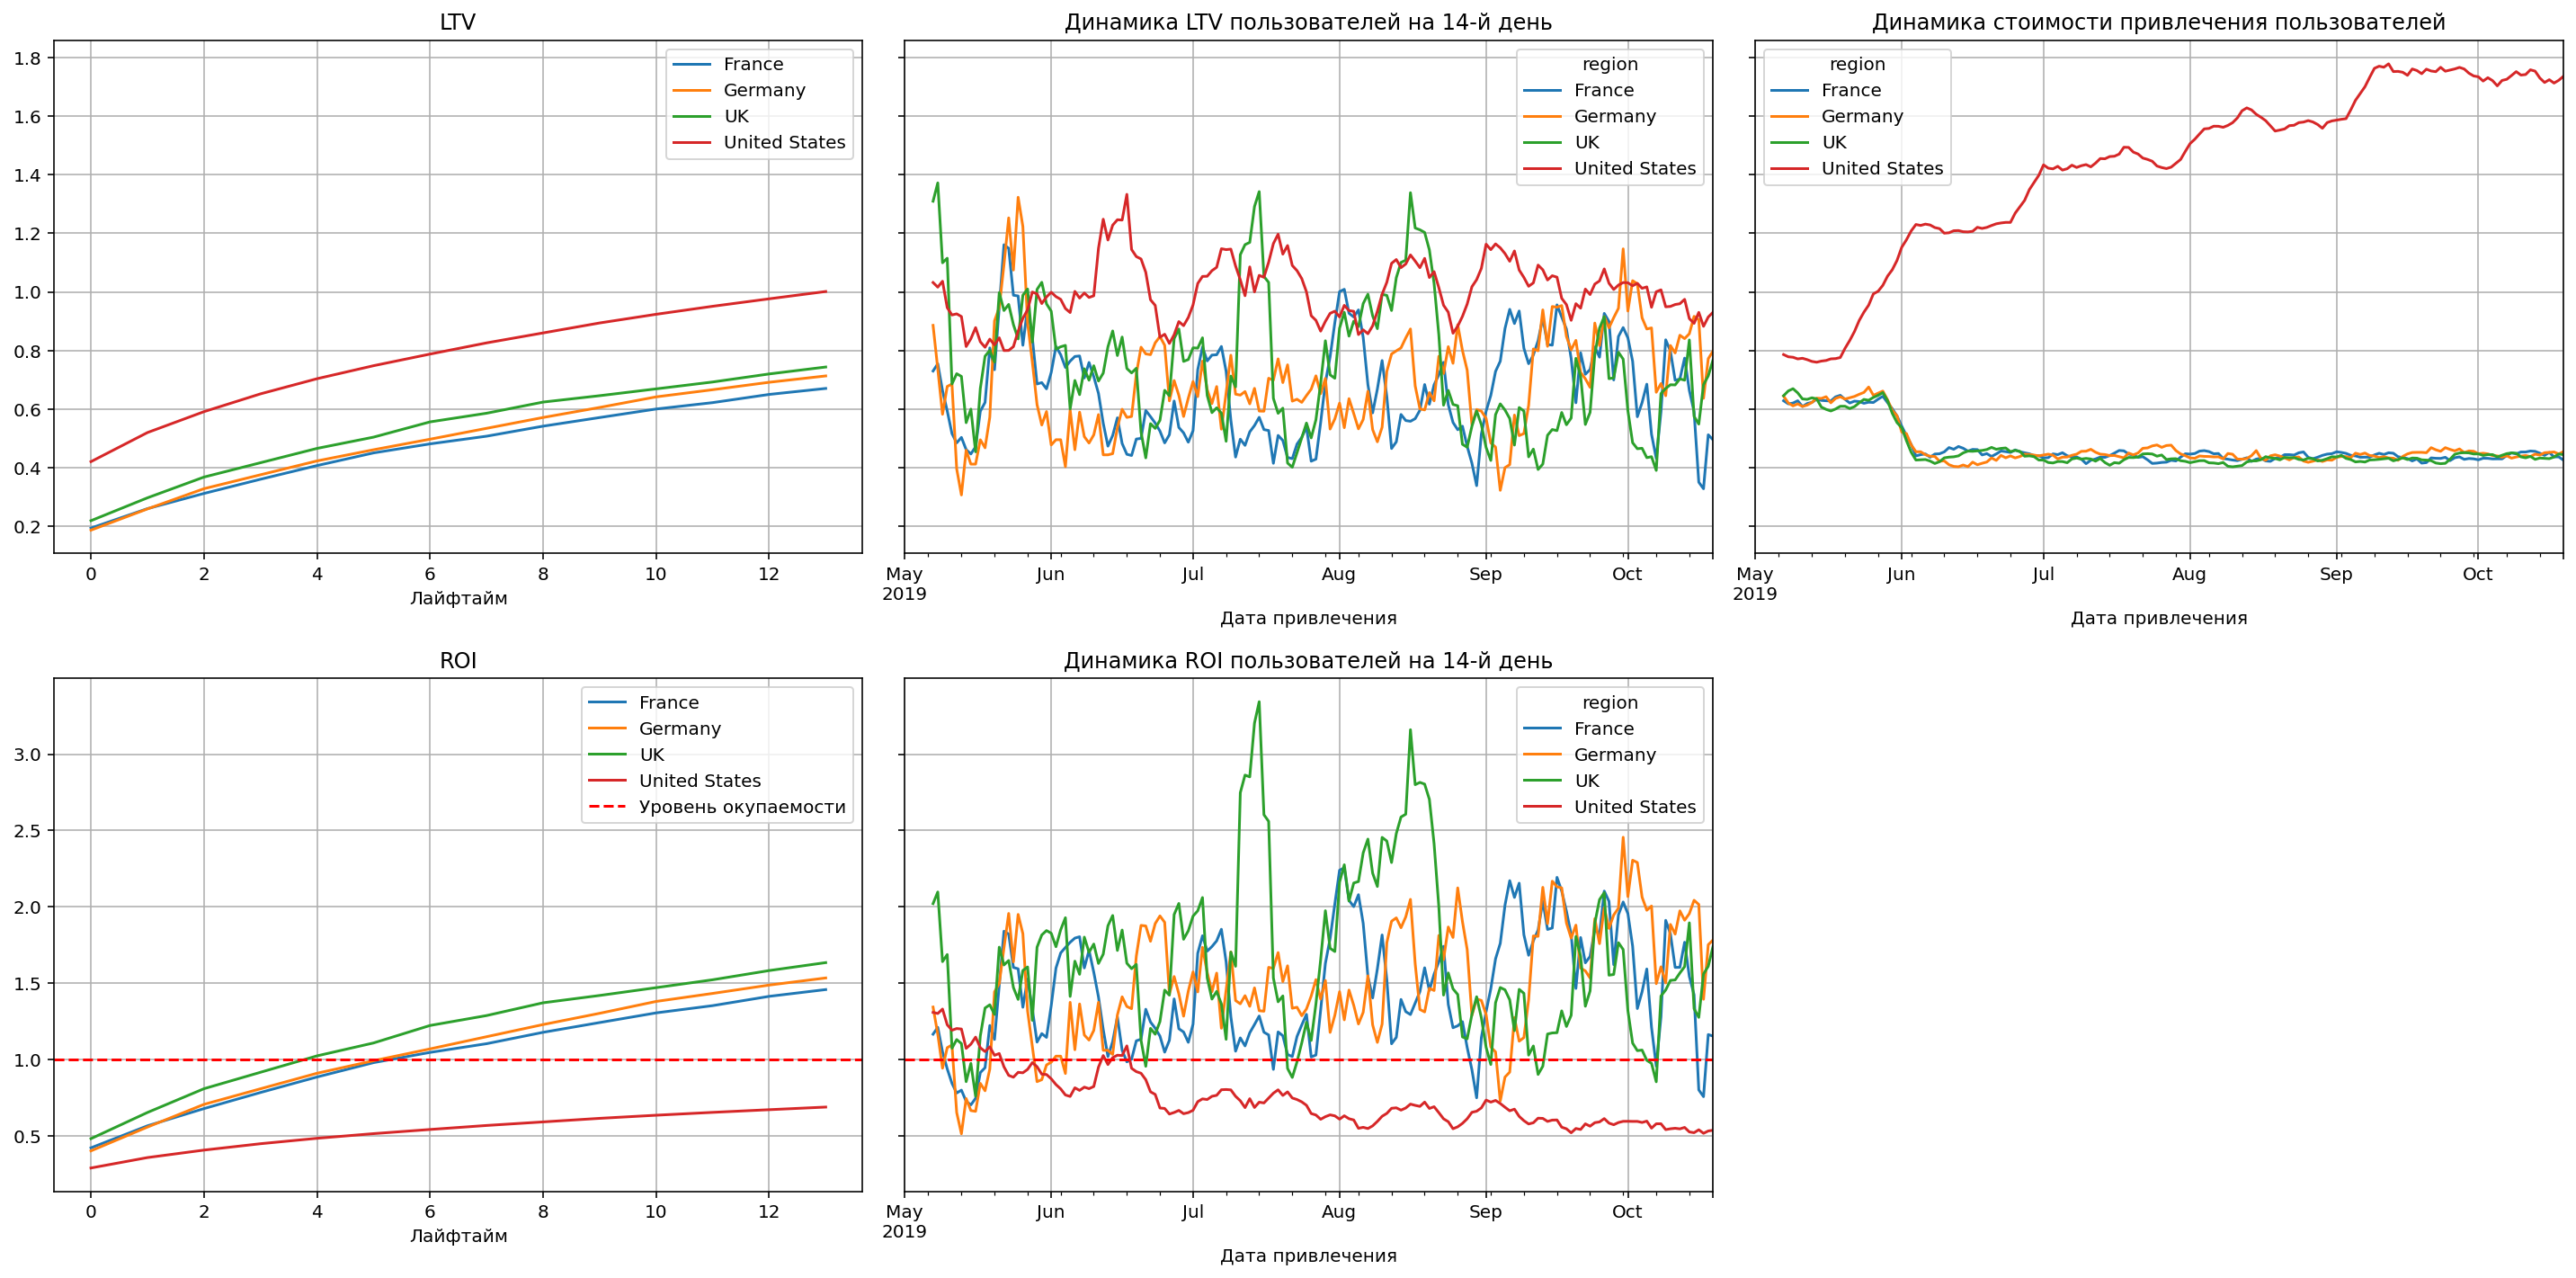

In [41]:
# выводим соответствующие графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon) 

**Промежуточный вывод:** 
- на обоих графиках по ROI видно, что инвестиции в рекламу на американский сегмент не окупаются;
- можно проследить как сильно повысилась динамика стоимости привлечения пользователей из США, что связано с неправильным выбором каналов привлечения, при том что в оставшихся регионах стоимость привлеченения пользователей снизилась;
- чтобы это исправить следует пересмотреть инвестиции в рекламные каналы для американского рынка, а также отдельно изучить рекламу в США.

Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [42]:
# считаем ltv и roi
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = \
get_ltv(profiles, orders, observation_date, analysis_horizon, dimensions=['channel'])

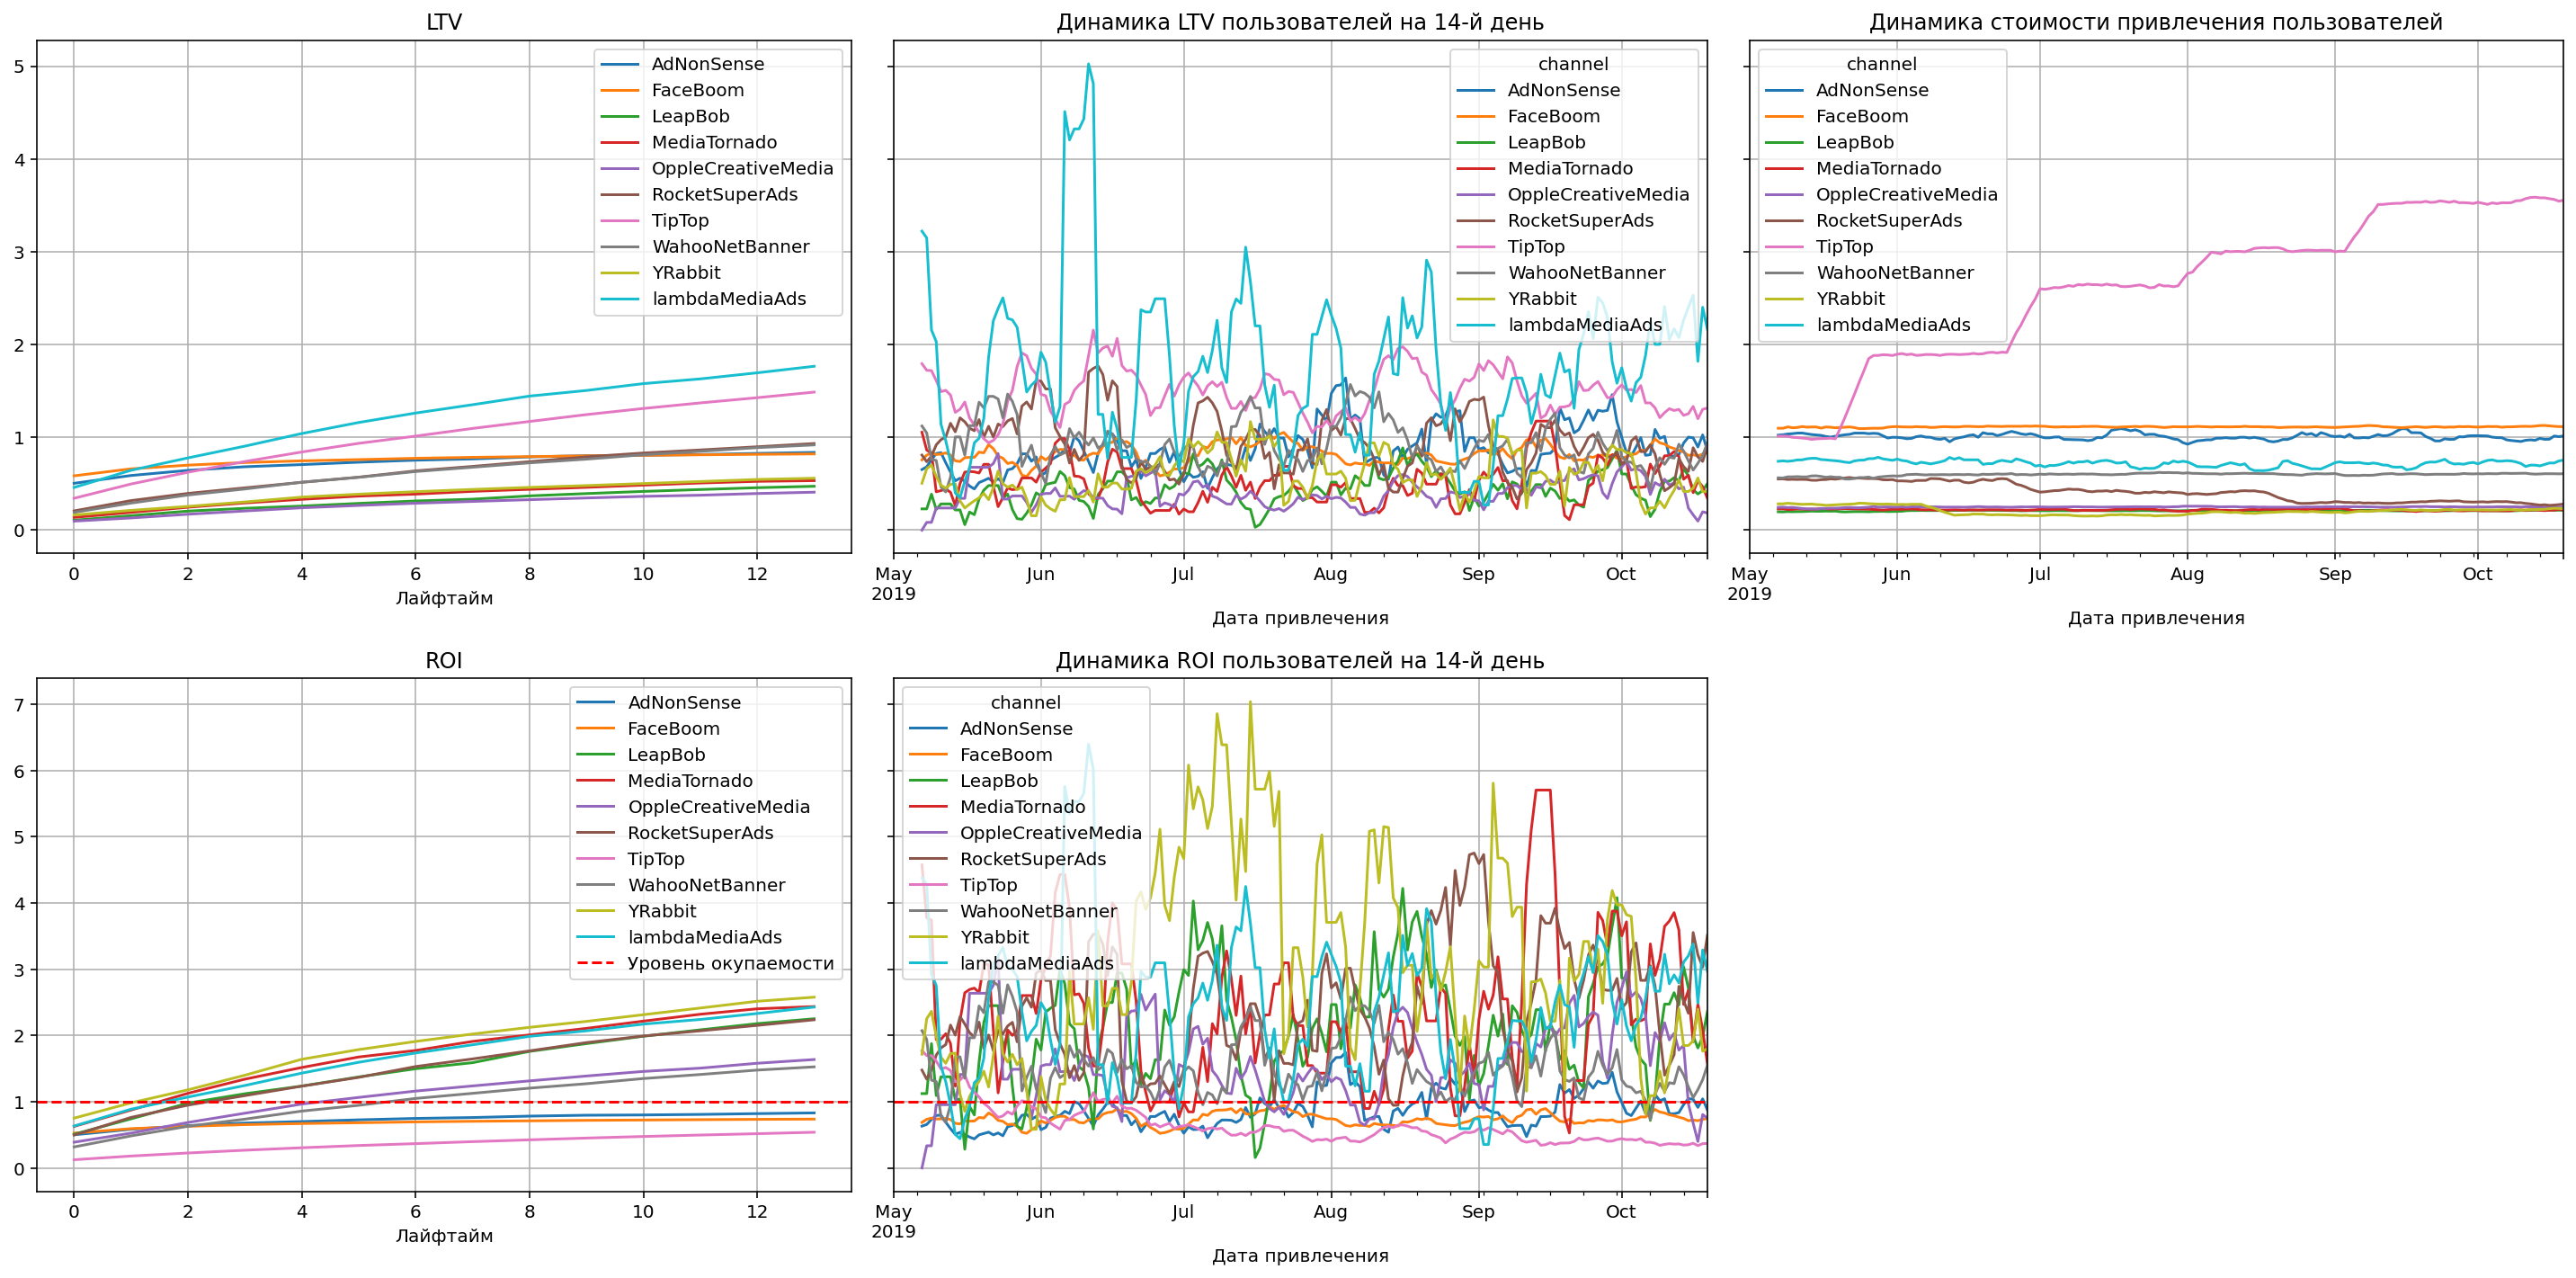

In [43]:
# выводим соответствующие графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon) 

**Промежуточный вывод:**
- по графикам ROI можно сразу сказать какие каналы привлечения не окупаются и это: *TipTop*, *AdNonSense*, *FaceBoom*, при этом больше всего расходов было на каналы *TipTop* и *FaceBoom*, т.е. инвестиции в них нужно пересмотреть;
- лучше всех по параметру ROI выделяются каналы: *YRabbit*, *MediaTornado*, *lambdaMediaAds*, *RocketSuperAds*, но поскольку у *YRabbit* и *MediaTornado* конверсия находится в районе 3-4% и удержание на 14-й день от 10% до 13% стоит их отбросить и оставить только **lambdaMediaAds** и **RocketSuperAds**, т.к. они имеют хорошую конверсию(10% и 6% соответственно) и удержание пользователей на 14-й день(от 15% до 20%).

**Общий вывод по окупаемости инвестиций в маркетинг:**
- За весь отчетный период наблюдается спад окупаемости. В начале отчетного периода текущая стратегия окупалась, но в течение последних пяти месяцев она перестала окупаться.
- Негативное влияние оказывают:
  1. Платформы: iPhone и Mac.
  2. Регионы: США.
  3. Рекламные каналы: TipTop, FaceBoom, AdNonSense.
- Проблемы окупаемости могут быть вызваны: неправильным распределением средств в рекламные каналы, например очень много вкладывается средств в каналы с высокой стоимостью привлечения пользователя и низкой LTV, а также с низким удержанием платящих пользователей на 14-й день, что приводит к отрицательной динамике ROI, а также с техническими проблемами на некоторых платформах.

## Общий вывод

**Причины неэффективности привлечения пользователей:**
- канал *TipTop* — значительное увеличение стоимости привлеченного пользователя (CAC), также находится ниже уровня окупаемости (ROI) на протяжение всего периода, при том что больше всего рекламных средств было вложено в этот канал (около 52%)
- канал *FaceBoom*, *AdNonSense* — выше среднего стоимость привлеченного пользователя, хуже всех остальных каналов по динамике удержания платящих пользователей на 14-й день (по 2% и 3%), в то время как у других каналов этот показатель составляет от 10%
- реклама в США — в то время как стоимость привлеченного пользователя (CAC) по Европе за отчетный период падает, в американском сегменте она значительно растет; также значительно меньше удержание платящих пользователей чем по Европе, из чего может вытекать проблема с рекламой не настроенной на целевую аудиторию, либо отдельными техническими проблемами с устройствами iPhone и Mac (которые больше всего распространены как раз на американском рынке)
- устройства iPhone и Mac — динамика ROI на 14-й день ниже остальных платформ, это может говорить о технических проблемах, связаных с некорректным отображением информации в приложении или на сайте (особенно в браузере Safari), а также проблемами с оплатой

**Рекомендации для отдела маркетинга:**
- стоит пересмотреть стратегию маркетинга в отношение каналов для инвестирования *TipTop*, *FaceBoom* и *AdNonSense* по причинам описанным выше и больше инвестировать в такие каналы как *lambdaMediaAds* и *RocketSuperAds*, т.к. они имеют хорошую конверсию(10% и 6% соответственно), удержание пользователей на 14-й день(от 15% до 20%) а также выходят выше уровня окупаемости ROI
- проверить рекламу в США, поскольку в этом регионе значительно меньше удержание платящих пользователей чем по Европе, возможно она не настроена на свою целевую аудиторию и поэтому можно провести тесты с новыми рекламными баннерами либо видео
- уделить больше внимания тестированию сайта(особенно на браузере Safari) и приложения Procrastinate Pro+ на таких устройствах как Mac и iPhone, возможно имеют место быть неправильное отображение информации, либо проблемы с оплатой из-за чего сильно падает динамика ROI на 14-й день